In [42]:
from keras.layers import Input, Dense, Conv2D, Activation, Dropout,BatchNormalization
from keras.models import Model
from keras import backend as K
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.optimizers import RMSprop, adam
from keras import metrics
from matplotlib import pyplot as plt
import keras
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from keras.callbacks import TensorBoard
#%matplotlib inline
from keras.models import Sequential
from keras import metrics
from sklearn.metrics import mutual_info_score



In [43]:
config = tf.ConfigProto() 
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
keras.backend.set_session(session)

In [44]:
data = pd.read_csv("CNV.csv")

In [45]:
np.shape(data)

(473, 15858)

In [47]:
data = data[data.columns[1:]].as_matrix()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [48]:
b = range(473)
data = data[0:, 1:]
data = data /np.max(data)
np.max(data)

In [49]:
np.max(data)

1.0

In [50]:
# inputs = data.iloc[0:,1:]
inputs = data[:,:]
print(np.shape(inputs))
inputs = inputs.astype('float32')
patients = inputs[:,:] 
patients1 = inputs[:,:]
X_train, X_test,y,y = train_test_split(inputs,b,test_size=0.2 , random_state=42)
print("X_train shape : ",np.shape(X_train))
print("x_test shape : ",np.shape(X_test))
print("patients shape : ",np.shape(patients))


(473, 15856)
X_train shape :  (378, 15856)
x_test shape :  (95, 15856)
patients shape :  (473, 15856)


In [51]:
X_train.shape


(378, 15856)

In [52]:
X_train =np.reshape(X_train, [-1, 1, 20159])
X_test = np.reshape(X_test ,[-1, 1, 20159])
patients = np.reshape(patients ,[-1, 1, 20159])
print("X_train shape : ",np.shape(X_train))
print("x_test shape : ",np.shape(X_test))
print("patients shape : ",np.shape(patients))


X_train shape :  (378, 1, 15856)
x_test shape :  (95, 1, 15856)
patients shape :  (473, 1, 15856)


In [62]:
input = Input(shape = (1, 20159))


x = Dense(1000,kernel_initializer='glorot_uniform', activation = 'relu')(input)
x = BatchNormalization()(x)
#50 #70:0.0163 #100: 0.0167 #120:0.0171 #150: 0.0159 #5: 0.0201 #25:0.0257 #batchSize =15 , 500:0.0204
bottleneck = Dense(3, kernel_initializer='glorot_uniform', activation = 'relu', name='bottleneck')(x)
#50    
x = Dense(3, kernel_initializer='glorot_uniform', activation = 'relu')(bottleneck)
    
x = Dense(1000, kernel_initializer='glorot_uniform', activation = 'relu')(x)
   
x = BatchNormalization()(x)
out = Dense(20159, kernel_initializer='glorot_uniform', activation='sigmoid')(x)


model = Model(input, out)

In [63]:
#adam = keras.optimizers.Adam(lr=0.0005)
#sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
#model.compile(optimizer=adam,loss='mse')
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer = RMSprop())
#def soft_acc(y_true, y_pred):
 #   return K.mean(K.equal(K.round(y_true), K.round(y_pred)))
#model.compile(optimizer=adam,loss='mse',metrics=[soft_acc])

adam = keras.optimizers.Adam(lr=0.00005)
sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
model.compile(optimizer=adam,
              loss='mse')

In [64]:
#model.summary()

In [65]:
earlyStopping =keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')
autoencoder_train = model.fit(X_train,X_train,epochs=10000,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test), callbacks=[earlyStopping])




Train on 378 samples, validate on 95 samples
Epoch 1/10000
378/378 [==============================] - 2s 6ms/step - loss: 0.2249 - val_loss: 0.2256
Epoch 2/10000
378/378 [==============================] - 0s 950us/step - loss: 0.2245 - val_loss: 0.2254
Epoch 3/10000
378/378 [==============================] - 0s 986us/step - loss: 0.2243 - val_loss: 0.2253
Epoch 4/10000
378/378 [==============================] - 0s 979us/step - loss: 0.2242 - val_loss: 0.2252
Epoch 5/10000
378/378 [==============================] - 0s 972us/step - loss: 0.2240 - val_loss: 0.2250
Epoch 6/10000
378/378 [==============================] - 0s 990us/step - loss: 0.2238 - val_loss: 0.2248
Epoch 7/10000
378/378 [==============================] - 0s 964us/step - loss: 0.2235 - val_loss: 0.2245
Epoch 8/10000
378/378 [==============================] - 0s 963us/step - loss: 0.2232 - val_loss: 0.2242
Epoch 9/10000
378/378 [==============================] - 0s 970us/step - loss: 0.2229 - val_loss: 0.2237
Epoch 10/100

Epoch 78/10000
378/378 [==============================] - 0s 960us/step - loss: 0.0145 - val_loss: 0.0144
Epoch 79/10000
378/378 [==============================] - 0s 975us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 80/10000
378/378 [==============================] - 0s 967us/step - loss: 0.0133 - val_loss: 0.0132
Epoch 81/10000
378/378 [==============================] - 0s 942us/step - loss: 0.0127 - val_loss: 0.0127
Epoch 82/10000
378/378 [==============================] - 0s 982us/step - loss: 0.0122 - val_loss: 0.0122
Epoch 83/10000
378/378 [==============================] - 0s 974us/step - loss: 0.0117 - val_loss: 0.0117
Epoch 84/10000
378/378 [==============================] - 0s 987us/step - loss: 0.0112 - val_loss: 0.0113
Epoch 85/10000
378/378 [==============================] - 0s 952us/step - loss: 0.0108 - val_loss: 0.0108
Epoch 86/10000
378/378 [==============================] - 0s 906us/step - loss: 0.0104 - val_loss: 0.0104
Epoch 87/10000
378/378 [======================

Epoch 155/10000
378/378 [==============================] - 0s 954us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 156/10000
378/378 [==============================] - 0s 983us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 157/10000
378/378 [==============================] - 0s 995us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 158/10000
378/378 [==============================] - 0s 970us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 159/10000
378/378 [==============================] - 0s 979us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 160/10000
378/378 [==============================] - 0s 991us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 161/10000
378/378 [==============================] - 0s 952us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 162/10000
378/378 [==============================] - 0s 979us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 163/10000
378/378 [==============================] - 0s 983us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 164/10000
378/378 [============

378/378 [==============================] - 0s 980us/step - loss: 4.9705e-04 - val_loss: 4.9713e-04
Epoch 300/10000
378/378 [==============================] - 0s 970us/step - loss: 4.9577e-04 - val_loss: 4.9577e-04
Epoch 301/10000
378/378 [==============================] - 0s 960us/step - loss: 4.9462e-04 - val_loss: 4.9432e-04
Epoch 302/10000
378/378 [==============================] - 0s 966us/step - loss: 4.9340e-04 - val_loss: 4.9294e-04
Epoch 303/10000
378/378 [==============================] - 0s 987us/step - loss: 4.9225e-04 - val_loss: 4.9155e-04
Epoch 304/10000
378/378 [==============================] - 0s 958us/step - loss: 4.9107e-04 - val_loss: 4.9025e-04
Epoch 305/10000
378/378 [==============================] - 0s 982us/step - loss: 4.9000e-04 - val_loss: 4.8890e-04
Epoch 306/10000
378/378 [==============================] - 0s 945us/step - loss: 4.8895e-04 - val_loss: 4.8752e-04
Epoch 307/10000
378/378 [==============================] - 0s 974us/step - loss: 4.8776e-04 - va

378/378 [==============================] - 0s 940us/step - loss: 4.3747e-04 - val_loss: 4.2129e-04
Epoch 442/10000
378/378 [==============================] - 0s 935us/step - loss: 4.3740e-04 - val_loss: 4.2117e-04
Epoch 443/10000
378/378 [==============================] - 0s 954us/step - loss: 4.3732e-04 - val_loss: 4.2109e-04
Epoch 444/10000
378/378 [==============================] - 0s 977us/step - loss: 4.3726e-04 - val_loss: 4.2099e-04
Epoch 445/10000
378/378 [==============================] - 0s 991us/step - loss: 4.3720e-04 - val_loss: 4.2087e-04
Epoch 446/10000
378/378 [==============================] - 0s 986us/step - loss: 4.3717e-04 - val_loss: 4.2070e-04
Epoch 447/10000
378/378 [==============================] - 0s 964us/step - loss: 4.3708e-04 - val_loss: 4.2058e-04
Epoch 448/10000
378/378 [==============================] - 0s 961us/step - loss: 4.3701e-04 - val_loss: 4.2048e-04
Epoch 449/10000
378/378 [==============================] - 0s 976us/step - loss: 4.3697e-04 - va

# Finding the best hyperparameters

In [15]:
loss = np.zeros((500,40))
val_loss = np.zeros((500,40))

for hid1Neurons in range (1, 5000, 10 ):
    for hid2Neurons in range (1,200,5):
        input = Input(shape = (1, 18977))
        x = Dense(hid1Neurons,kernel_initializer='glorot_uniform', activation = 'relu')(input)
        x = BatchNormalization()(x)
        #50 #70:0.0163 #100: 0.0167 #120:0.0171 #150: 0.0159 #5: 0.0201 #25:0.0257 #batchSize =15 , 500:0.0204
        bottleneck = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu', name='bottleneck')(x) 
        ######################################################################################################
        x = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(bottleneck)
        x = Dense(hid1Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(x)
        x = BatchNormalization()(x)
        out = Dense(18977, kernel_initializer='glorot_uniform', activation='sigmoid')(x)
        model = Model(input, out)
        
        #######################################################################################################
        sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
        model.compile(optimizer=adam,
              loss='mse')
        #######################################################################################################
        earlyStopping =keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=6,
                              verbose=0, mode='auto')
        autoencoder_train = model.fit(X_train,X_train,epochs=10000,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test), callbacks=[earlyStopping])
        loss[hid1Neurons,hid2Neurons] = autoencoder_train.history['loss']
        val_loss[hid1Neurons,hid2Neurons] = autoencoder_train.history['val_loss']
        print("Number of neurons of 1st layer:{a},2d layer:{b}, Loss is:{c} ".format(a =hid1Neurons, b = hid2Neurons,
                                                                                    c =loss[hid1Neurons,hid2Neurons] ))
        print("Number of neurons of 1st layer:{a},2d layer:{b}, validation Loss is:{c} ".format(a =hid1Neurons, b = hid2Neurons,
                                                                                    c =val_loss[hid1Neurons,hid2Neurons] ))

Train on 411 samples, validate on 103 samples
Epoch 1/10000
411/411 [==============================] - 1s 2ms/step - loss: 0.2429 - val_loss: 0.2429
Epoch 2/10000
411/411 [==============================] - 0s 408us/step - loss: 0.2415 - val_loss: 0.2414
Epoch 3/10000
411/411 [==============================] - 0s 351us/step - loss: 0.2399 - val_loss: 0.2398
Epoch 4/10000
411/411 [==============================] - 0s 339us/step - loss: 0.2384 - val_loss: 0.2382
Epoch 5/10000
411/411 [==============================] - 0s 414us/step - loss: 0.2368 - val_loss: 0.2367
Epoch 6/10000
411/411 [==============================] - 0s 427us/step - loss: 0.2352 - val_loss: 0.2350
Epoch 7/10000
411/411 [==============================] - 0s 474us/step - loss: 0.2336 - val_loss: 0.2334
Epoch 8/10000
411/411 [==============================] - 0s 428us/step - loss: 0.2319 - val_loss: 0.2317
Epoch 9/10000
411/411 [==============================] - 0s 409us/step - loss: 0.2302 - val_loss: 0.2300
Epoch 10/10

Epoch 78/10000
411/411 [==============================] - 0s 421us/step - loss: 0.0788 - val_loss: 0.0784
Epoch 79/10000
411/411 [==============================] - 0s 414us/step - loss: 0.0772 - val_loss: 0.0768
Epoch 80/10000
411/411 [==============================] - 0s 449us/step - loss: 0.0756 - val_loss: 0.0752
Epoch 81/10000
411/411 [==============================] - 0s 388us/step - loss: 0.0741 - val_loss: 0.0736
Epoch 82/10000
411/411 [==============================] - 0s 348us/step - loss: 0.0725 - val_loss: 0.0721
Epoch 83/10000
411/411 [==============================] - 0s 399us/step - loss: 0.0710 - val_loss: 0.0706
Epoch 84/10000
411/411 [==============================] - 0s 385us/step - loss: 0.0696 - val_loss: 0.0692
Epoch 85/10000
411/411 [==============================] - 0s 375us/step - loss: 0.0681 - val_loss: 0.0677
Epoch 86/10000
411/411 [==============================] - 0s 417us/step - loss: 0.0667 - val_loss: 0.0663
Epoch 87/10000
411/411 [======================

Epoch 155/10000
411/411 [==============================] - 0s 437us/step - loss: 0.0175 - val_loss: 0.0176
Epoch 156/10000
411/411 [==============================] - 0s 389us/step - loss: 0.0172 - val_loss: 0.0173
Epoch 157/10000
411/411 [==============================] - 0s 355us/step - loss: 0.0169 - val_loss: 0.0170
Epoch 158/10000
411/411 [==============================] - 0s 369us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 159/10000
411/411 [==============================] - 0s 372us/step - loss: 0.0164 - val_loss: 0.0164
Epoch 160/10000
411/411 [==============================] - 0s 394us/step - loss: 0.0161 - val_loss: 0.0162
Epoch 161/10000
411/411 [==============================] - 0s 432us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 162/10000
411/411 [==============================] - 0s 423us/step - loss: 0.0156 - val_loss: 0.0157
Epoch 163/10000
411/411 [==============================] - 0s 359us/step - loss: 0.0154 - val_loss: 0.0154
Epoch 164/10000
411/411 [============

KeyboardInterrupt: 

In [19]:
loss = np.zeros((500,40))
val_loss = np.zeros((500,40))

for hid1Neurons in range (1, 5000, 10 ):
       for hid2Neurons in range (1,200,5):
                input = Input(shape = (1, 18977))
                x = Dense(hid1Neurons,kernel_initializer='glorot_uniform', activation = 'relu')(input)
                x = BatchNormalization()(x)
                #50 #70:0.0163 #100: 0.0167 #120:0.0171 #150: 0.0159 #5: 0.0201 #25:0.0257 #batchSize =15 , 500:0.0204
                bottleneck = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu', name='bottleneck')(x)
                 ######################################################################################################
                x = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(bottleneck)
                x = Dense(hid1Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(x)
                x = BatchNormalization()(x)
                out = Dense(18977, kernel_initializer='glorot_uniform', activation='sigmoid')(x)
                model = Model(input, out)
                #######################################################################################################
                sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
                model.compile(optimizer=adam,loss='mse')
                #######################################################################################################
                earlyStopping =keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=6, verbose=0, mode='auto')
                autoencoder_train = model.fit(X_train,X_train,epochs=150, batch_size=32, shuffle=True, validation_data=(X_test, X_test), callbacks=[earlyStopping])
                Loss = autoencoder_train.history['loss']
                Val_loss = autoencoder_train.history['val_loss']
                loss[hid1Neurons,hid2Neurons] = Loss[149]
                val_loss[hid1Neurons,hid2Neurons] = Val_loss[149]
                print("Number of neurons of 1st layer:{a},2d layer:{b}, Loss is:{c} ".format(a = hid1Neurons, b = hid2Neurons, c =loss[hid1Neurons,hid2Neurons] ))
                print("Number of neurons of 1st layer:{a},2d layer:{b}, validation Loss is:{c} ".format(a = hid1Neurons, b = hid2Neurons, c =val_loss[hid1Neurons,hid2Neurons] ))

Train on 411 samples, validate on 103 samples
Epoch 1/150
411/411 [==============================] - 1s 2ms/step - loss: 0.2403 - val_loss: 0.2363
Epoch 2/150
411/411 [==============================] - 0s 338us/step - loss: 0.2313 - val_loss: 0.2274
Epoch 3/150
411/411 [==============================] - 0s 321us/step - loss: 0.2227 - val_loss: 0.2192
Epoch 4/150
411/411 [==============================] - 0s 331us/step - loss: 0.2147 - val_loss: 0.2115
Epoch 5/150
411/411 [==============================] - 0s 325us/step - loss: 0.2071 - val_loss: 0.2041
Epoch 6/150
411/411 [==============================] - 0s 320us/step - loss: 0.1998 - val_loss: 0.1969
Epoch 7/150
411/411 [==============================] - 0s 425us/step - loss: 0.1927 - val_loss: 0.1899
Epoch 8/150
411/411 [==============================] - 0s 425us/step - loss: 0.1858 - val_loss: 0.1831
Epoch 9/150
411/411 [==============================] - 0s 413us/step - loss: 0.1791 - val_loss: 0.1764
Epoch 10/150
411/411 [=======

KeyboardInterrupt: 

# Plotting Losses ( Validation and training ) 

In [66]:

epochs = 
loss = autoencoder_train.history['loss']
np.shape(loss)

(579,)

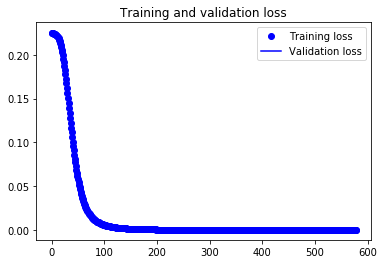

In [67]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Feature extraction 



m2 = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)
Y = m2.predict(patients)
Y =np.reshape(Y , (473, 3))
df = pd.DataFrame(Y)
df.to_csv("3CNV.csv",index = False)

np.shape(Y)
#print(Y[513, :])

In [68]:
m2 = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)
Y = m2.predict(patients)
Y =np.reshape(Y , (473, 3))
df = pd.DataFrame(Y)
df.to_csv("3CNV.csv",index = False)

In [70]:
p=pd.read_csv("3CNV.csv")
np.shape(p)
pd.DataFrame(p)
#p1 = pd.read_csv("500features.csv")
#mean_squared_error(y_true= p , y_pred= p1)

,0,1,2
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,2.405365,0.969846,4.181699
3,6.177290,2.310748,10.639936
4,6.221000,2.593643,10.387173
5,2.393581,1.054199,4.238043
6,2.480137,1.004355,4.121332
7,2.377229,1.017424,4.137586
8,2.518858,0.913558,4.099765
9,2.432282,0.971981,4.137338


# Finding significant genes 

In [ ]:
164,254,250,671,88,53,273,87,225,92,258,317,134,14684,1001,171,156,1705,1184,1181,8016,559,611,1180,56,1183,14685,549,63,163 15430 15429,14683   817   534  4181   178 15431  1458   625   969   228  1185  1182   968   125   988  1375
14682   832   174    14  2864 12588   550  6398    84  1153   334    95   320   268   256  1845

In [131]:
Base_pred = model.predict(patients)
Base_pred = np.reshape(Base_pred , (514 , 18977))
print(np.shape(Base_pred))
np.shape(Base_pred[0,:])
m2 = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)
Y = m2.predict(patients)
Y =np.reshape(Y , (514 , 50))
print("features shape : ", np.shape(Y))


(514, 18977)
features shape :  (514, 50)


In [33]:
Error[0 , 0:30]
#patients1[0,0:10]


#np.shape(Error)
#c =patients1.columns.values.tolist()
#t=patients1[:]
#c = c[1]
#t[c] = 0
#print (c)
#t


array([1.72153423, 1.72153423, 1.72153423, 1.72153423, 1.72153423,
       1.72153423, 1.72153423, 1.72153423, 1.72153423, 1.72153423,
       1.72153423, 1.72153423, 1.72153423, 1.72153423, 1.72153423,
       1.72153423, 1.72153423, 1.72153423, 1.72153423, 1.72153423,
       1.72153423, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [18]:
np.savetxt("error.csv",Error)

In [55]:
Error = np.zeros((1,18977))
Error.astype(float)

for col in range(18977):
    temp = patients1[:] 
    temp[:, col] = 0
    temp_error=0
    for row in range(514):
        t =np.reshape(temp[row,:], (1,1,18977))
        pred = model.predict(t)
        #print(np.shape(pred))
    ####################################################################
        pred = np.reshape(pred , (1 , 18977))
        #print(np.shape(pred))
        b= Base_pred[row , :]
        b = np.reshape(b , (1 , 18977))
        #print(np.shape(b))
        temp_error = temp_error+ mean_squared_error(y_true= b , y_pred= pred)
    Error[0,col]= temp_error 
    print(col)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
1021

11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
1157

12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
1294

14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
1431

15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
1567

16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
1704

18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
1840

# mutual info score ( finding significant genes ) 

In [134]:
Error = np.zeros((1,18977))

for col in range(18977):
    tmpError = 0
    temp = np.copy(patients1)
    temp[:, col] = 0
    temp =np.reshape(temp,(-1,1,18977))
    m2 = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)
    ZeroPred= m2.predict(temp)
    ZeroPred =np.reshape(ZeroPred , (514 , 50))
    for row in range(514):
      #  tmpError = tmpError + mutual_info_score(Y[row , :], ZeroPred[row , :], contingency=None)
        tmpError = tmpError +mean_squared_error (Y[row , :], ZeroPred[row , :])
    Error[0,col]= tmpError
    #Error[0,col] = mean_squared_error (Y, ZeroPred)
    print(col , " Error = ", Error[0,col] )
np.savetxt("error.csv",Error)
print("Errors have been saved!")

0  Error =  0.005230342690813572
1  Error =  0.01908204100260491
2  Error =  0.0004552648574929208
3  Error =  0.005424848892157996
4  Error =  0.00013802180697375377
5  Error =  0.00954667570329093
6  Error =  0.0003622780076000254
7  Error =  0.007869325514056058
8  Error =  0.016162564479200725
9  Error =  0.02753964179095192
10  Error =  0.002855624932676548
11  Error =  0.0037210494466322075
12  Error =  0.0024443200625796635
13  Error =  0.004613615004885219
14  Error =  0.06461007361428983
15  Error =  0.0021486058218318504
16  Error =  0.03837637413192496
17  Error =  7.631654378315034e-05
18  Error =  0.0005550702094403448
19  Error =  0.0033680362162655797
20  Error =  0.003076137609909324
21  Error =  0.003839875898464129
22  Error =  0.006644315071667961
23  Error =  0.014374635264460256
24  Error =  0.015607589249183818
25  Error =  0.0027357410419313055
26  Error =  0.0018179304247016859
27  Error =  0.00750209334837848
28  Error =  0.014610307443618513
29  Error =  0.012

236  Error =  0.006268103971066807
237  Error =  0.00032587130516148477
238  Error =  0.011586547018763937
239  Error =  0.0065049427512064995
240  Error =  0.016796646618388422
241  Error =  0.007077979035358339
242  Error =  0.01915410257779948
243  Error =  0.003967217506215093
244  Error =  0.0005565324129470639
245  Error =  0.010731224367336978
246  Error =  0.0004058417759349453
247  Error =  0.00031414213240310573
248  Error =  0.03028144281773848
249  Error =  0.00017781615502698855
250  Error =  0.3226712786358803
251  Error =  0.0021804160083949142
252  Error =  0.003304438865082915
253  Error =  0.0012376105497295953
254  Error =  0.32772928727916223
255  Error =  0.010711586644903015
256  Error =  0.05194163411022146
257  Error =  0.0014536502263347018
258  Error =  0.18019091077189842
259  Error =  0.015306978145328998
260  Error =  0.0038636582216895476
261  Error =  0.0004760006782955628
262  Error =  0.0031073362658847747
263  Error =  0.0029365864885981807
264  Error 

467  Error =  0.01279604824235836
468  Error =  0.000252332825276369
469  Error =  0.014726079362594291
470  Error =  0.0021136766269869156
471  Error =  0.0003152447984753337
472  Error =  0.00025193399717515774
473  Error =  0.00048581639559941436
474  Error =  0.001252012162424876
475  Error =  0.00091127221336329
476  Error =  0.006553482697217561
477  Error =  0.0008063589424904191
478  Error =  0.001829543416882018
479  Error =  0.0017516170628226746
480  Error =  0.01061885602931767
481  Error =  0.0007817385832940005
482  Error =  0.005634892247599055
483  Error =  0.0016034656043721895
484  Error =  0.011222831282882595
485  Error =  6.306988405935243e-05
486  Error =  0.0010461400911530028
487  Error =  0.00593341790865054
488  Error =  0.00032848646680783133
489  Error =  0.012072450312942351
490  Error =  0.00036459918676889913
491  Error =  0.003044018285152106
492  Error =  0.009649654240000416
493  Error =  0.020981739378839848
494  Error =  0.0001708198290009122
495  Er

698  Error =  0.0011888574570164678
699  Error =  0.0007790855254086182
700  Error =  0.010168469286369941
701  Error =  0.014647675684358319
702  Error =  0.00045827211870630435
703  Error =  0.00018192061390820413
704  Error =  4.3401511719998176e-05
705  Error =  0.0007031015033902577
706  Error =  8.093931279962163e-05
707  Error =  0.0008974451751058155
708  Error =  0.0006864730051221457
709  Error =  0.0001058130945579272
710  Error =  0.00024286904093440143
711  Error =  0.0007662422142047376
712  Error =  0.0001307585682983614
713  Error =  0.00011955985916412004
714  Error =  0.004050249861847988
715  Error =  0.0012986225144686614
716  Error =  0.00010712118351818845
717  Error =  0.00012780908209464314
718  Error =  0.006541614995369205
719  Error =  0.0033539362083555837
720  Error =  0.0010448102993052544
721  Error =  0.0004996165589687962
722  Error =  2.448430284474057e-05
723  Error =  7.689749852879402e-06
724  Error =  4.280090116637325e-05
725  Error =  0.000227145

929  Error =  0.00036821374344242486
930  Error =  0.0025497296855760965
931  Error =  0.016828804527317942
932  Error =  0.0006209898378131129
933  Error =  0.00043586798795391957
934  Error =  0.02840775761463732
935  Error =  0.0031976513431288822
936  Error =  0.001014696701204798
937  Error =  0.0012234644234254688
938  Error =  0.0031308059530914534
939  Error =  0.0007850794562003216
940  Error =  0.0012182472727069182
941  Error =  0.0009401324324844751
942  Error =  0.0008328492194336068
943  Error =  0.003655496692175575
944  Error =  0.003522112163652835
945  Error =  0.006597072207298993
946  Error =  0.00021066927102708632
947  Error =  0.010145661990192067
948  Error =  0.0049178871666129
949  Error =  0.0017358573808792244
950  Error =  0.0020949387321707036
951  Error =  1.674530028594745e-05
952  Error =  0.0015378750655337114
953  Error =  0.004644888374908618
954  Error =  0.000334808169007772
955  Error =  0.005576765328058286
956  Error =  0.011353217772671953
957 

1155  Error =  0.0049092598666291565
1156  Error =  0.0014525639693818704
1157  Error =  0.016102588753163616
1158  Error =  0.03547416932417491
1159  Error =  0.0009898982476315155
1160  Error =  0.0038348648706580946
1161  Error =  0.0329630377085266
1162  Error =  0.0010392552701685709
1163  Error =  0.0020541732990757566
1164  Error =  0.002585826765988772
1165  Error =  0.011292197934936077
1166  Error =  1.8600945900004717e-05
1167  Error =  9.753460554762228e-06
1168  Error =  1.2492228762539526e-05
1169  Error =  0.0003795662029872915
1170  Error =  0.0033629380730104685
1171  Error =  0.0011242821110712953
1172  Error =  0.00029842612670805124
1173  Error =  0.002373611184232516
1174  Error =  0.00018383177981107224
1175  Error =  0.0003834073157804596
1176  Error =  0.0005006603763177964
1177  Error =  0.00015783816965964093
1178  Error =  0.00026861672377087586
1179  Error =  0.00035887912587995174
1180  Error =  0.10032714659875808
1181  Error =  0.11267764611910636
1182  E

1379  Error =  0.02417250998686915
1380  Error =  0.019941008541268346
1381  Error =  0.005775411048404067
1382  Error =  0.002497343108586847
1383  Error =  0.01484805511046261
1384  Error =  0.0004957131959875127
1385  Error =  0.0001614060257271177
1386  Error =  0.0003629404129767977
1387  Error =  0.005589975108861722
1388  Error =  0.0008859534427667626
1389  Error =  0.0006853428754212132
1390  Error =  0.0027344171388143934
1391  Error =  0.004025733525518049
1392  Error =  0.00024628369017420937
1393  Error =  0.048378575409888214
1394  Error =  0.0001235415478291202
1395  Error =  0.013670734404627183
1396  Error =  0.00252189851464113
1397  Error =  9.014039644128502e-05
1398  Error =  0.005586192826228853
1399  Error =  0.002677584102087849
1400  Error =  0.00031925527003551224
1401  Error =  0.02664600536593298
1402  Error =  9.015876412554746e-05
1403  Error =  0.012422524367423193
1404  Error =  0.00110125967702146
1405  Error =  0.0022167904076866307
1406  Error =  0.00

1602  Error =  0.00012754894045130527
1603  Error =  0.047887349452585326
1604  Error =  0.0003309797766775091
1605  Error =  0.0003508105710277043
1606  Error =  0.00020803267057445396
1607  Error =  0.020131988953224322
1608  Error =  0.0004505340697704696
1609  Error =  0.006300758292127284
1610  Error =  0.0054826178653542
1611  Error =  0.0005764078697261255
1612  Error =  0.0008731263475230122
1613  Error =  0.0002569020203999628
1614  Error =  0.000677016499583516
1615  Error =  0.0006995115107577554
1616  Error =  5.079268162511141e-05
1617  Error =  6.383823060751581e-05
1618  Error =  0.004427696175170581
1619  Error =  0.01389706050904671
1620  Error =  0.004211076991559537
1621  Error =  5.0830783880684294e-05
1622  Error =  0.0006824486279271014
1623  Error =  0.008638024594944227
1624  Error =  0.0005572346018070107
1625  Error =  0.0001327729919706755
1626  Error =  0.0010785400607602469
1627  Error =  0.0002214848034851613
1628  Error =  0.006228155094689214
1629  Error

1825  Error =  0.00011912370257594063
1826  Error =  0.014514585968186111
1827  Error =  0.0002030686240743762
1828  Error =  0.00031007508584224297
1829  Error =  0.012136012299791332
1830  Error =  0.00010128782300711237
1831  Error =  0.0018700701044558343
1832  Error =  7.092764891947212e-05
1833  Error =  0.0010457547506135256
1834  Error =  3.6920573826648706e-05
1835  Error =  0.013874758142765842
1836  Error =  6.998615459519186e-05
1837  Error =  0.0008152891996378031
1838  Error =  7.830798243269044e-05
1839  Error =  0.0011119860449468888
1840  Error =  0.0006751350156442015
1841  Error =  0.000931624939723541
1842  Error =  0.0008963827869976626
1843  Error =  0.0003628796037400406
1844  Error =  0.0009240755403006062
1845  Error =  0.05135406588777869
1846  Error =  0.00028269837226369
1847  Error =  8.793439064902486e-05
1848  Error =  0.0012407279744017785
1849  Error =  0.00037997810271228616
1850  Error =  0.00014420696413797174
1851  Error =  8.948571038303044e-05
185

2047  Error =  0.00020969877396481706
2048  Error =  0.00010008501835656602
2049  Error =  0.0012039511173558282
2050  Error =  0.00012186386501511492
2051  Error =  0.0003458029979839239
2052  Error =  0.002068821444412894
2053  Error =  0.0001160336702827891
2054  Error =  0.0003118389804814825
2055  Error =  0.0010390343738784225
2056  Error =  0.0019336457610563684
2057  Error =  0.0004082896768231592
2058  Error =  0.0009770023255519789
2059  Error =  0.008870120545402926
2060  Error =  1.9672343171350803e-05
2061  Error =  6.721695587064147e-05
2062  Error =  0.0006117483515581945
2063  Error =  0.0005018734165957994
2064  Error =  0.0006789851320547768
2065  Error =  0.0099576191658457
2066  Error =  0.0028638142740229355
2067  Error =  6.272208977975424e-06
2068  Error =  1.4082927112468724e-05
2069  Error =  9.87165746169083e-06
2070  Error =  7.0534431101387796e-06
2071  Error =  2.8098402911069797e-06
2072  Error =  0.005391348245462169
2073  Error =  0.01563701481010149
207

2269  Error =  0.00015231397224946264
2270  Error =  0.00018894054886686718
2271  Error =  3.3238665782420185e-05
2272  Error =  8.586690440637312e-05
2273  Error =  9.774536697459979e-05
2274  Error =  0.0017711191787839198
2275  Error =  0.00019355047137636916
2276  Error =  0.0002972739488044107
2277  Error =  0.0023933697701394863
2278  Error =  0.00024352838454078096
2279  Error =  0.007850456095845004
2280  Error =  0.0003532118893208036
2281  Error =  0.0018672913505781707
2282  Error =  0.007214021899699219
2283  Error =  0.00302733055628579
2284  Error =  0.00042662028210571634
2285  Error =  0.00019981547071079575
2286  Error =  0.002422353216729789
2287  Error =  0.004035433888564199
2288  Error =  0.010860620165544788
2289  Error =  0.0003671296728668949
2290  Error =  0.0015395216801792344
2291  Error =  0.010600070520865756
2292  Error =  0.00027547350533652093
2293  Error =  0.00033662291128599975
2294  Error =  0.0002185334476934031
2295  Error =  0.00020404015706532164

2491  Error =  0.0002988212977754756
2492  Error =  0.00022622788469561783
2493  Error =  9.420765550771648e-06
2494  Error =  6.223098305468966e-05
2495  Error =  0.0006083663005647111
2496  Error =  0.0025865724329445783
2497  Error =  7.671757008731461e-05
2498  Error =  0.004047748356789782
2499  Error =  2.3976825636040644e-05
2500  Error =  0.0017252947396073637
2501  Error =  0.011757254612615675
2502  Error =  0.0022806352516795414
2503  Error =  0.00035084200589441394
2504  Error =  0.0022205198120253122
2505  Error =  0.0041438333139183214
2506  Error =  0.0023741897861917494
2507  Error =  1.9593055723632347e-05
2508  Error =  0.00036560518190853486
2509  Error =  4.830992417481639e-05
2510  Error =  0.015967411532933795
2511  Error =  0.0027266189194956603
2512  Error =  0.005796127498967962
2513  Error =  8.2533085670633e-05
2514  Error =  0.0003449359037688282
2515  Error =  2.9637904411572435e-05
2516  Error =  0.00015971531220237978
2517  Error =  0.00018869997909565228

2714  Error =  0.0005151372833722689
2715  Error =  0.015310136139532915
2716  Error =  0.0008718426556075798
2717  Error =  0.0005062804917983499
2718  Error =  0.0009297193396204228
2719  Error =  0.001226321887857651
2720  Error =  0.003283076688237685
2721  Error =  0.00023479837595274944
2722  Error =  0.00025752559172076417
2723  Error =  0.020374898041218614
2724  Error =  0.00021742480725350788
2725  Error =  0.00033283755930746395
2726  Error =  0.00010724216666835318
2727  Error =  0.027038045117095066
2728  Error =  0.00016543969171145534
2729  Error =  0.0051807140887945025
2730  Error =  8.942277974455237e-05
2731  Error =  0.00029704171498872584
2732  Error =  2.2110857386792304e-05
2733  Error =  0.00016987454775829747
2734  Error =  0.000603651189347687
2735  Error =  2.6813731697217236e-05
2736  Error =  1.1902259838159068e-05
2737  Error =  0.003299828385627812
2738  Error =  0.00041785309718989083
2739  Error =  3.290155356339142e-05
2740  Error =  5.369619580985335e

2936  Error =  0.00028875810883199904
2937  Error =  0.00026099393878098454
2938  Error =  6.556763536291754e-05
2939  Error =  0.002453262237117948
2940  Error =  4.70402263639258e-05
2941  Error =  0.0034880020538050616
2942  Error =  0.0004433449972403025
2943  Error =  2.7478262746516435e-05
2944  Error =  0.0004182091800313259
2945  Error =  0.0005652400407711866
2946  Error =  0.0003948300418912254
2947  Error =  0.004172853205709259
2948  Error =  9.733960524727081e-06
2949  Error =  0.0001406661526791586
2950  Error =  0.00881083012159678
2951  Error =  0.02231062114994309
2952  Error =  0.00010252418671186092
2953  Error =  0.00026847793626672
2954  Error =  0.0006579163715425551
2955  Error =  0.00012071482116482457
2956  Error =  7.418292697281004e-05
2957  Error =  3.179698253047425e-05
2958  Error =  6.773456623321295e-05
2959  Error =  9.786919726728627e-05
2960  Error =  2.1914096896225033e-05
2961  Error =  0.002182990588997402
2962  Error =  0.00014172719616326046
2963

3159  Error =  0.00014015705307901527
3160  Error =  0.0010050104551524441
3161  Error =  0.005987716587458891
3162  Error =  0.0051466304774479
3163  Error =  0.001410309599066295
3164  Error =  0.00017908000046062966
3165  Error =  0.0002600218783470609
3166  Error =  0.0002400265959536796
3167  Error =  0.00032405868348739375
3168  Error =  0.008792718234293062
3169  Error =  4.646931282881184e-05
3170  Error =  0.02320100427664329
3171  Error =  0.0005888848562811688
3172  Error =  0.0008809147563155761
3173  Error =  0.00017235591634445768
3174  Error =  0.010563337635326242
3175  Error =  5.270076882091246e-05
3176  Error =  0.0036946991086921344
3177  Error =  0.0005973018955103271
3178  Error =  0.0001877861195254127
3179  Error =  0.00010760807769116809
3180  Error =  6.365236179561862e-05
3181  Error =  0.00012963748195593539
3182  Error =  0.0014876993977852582
3183  Error =  0.000183318286742562
3184  Error =  3.0370222708242522e-05
3185  Error =  0.0008225077467542974
3186

3382  Error =  0.0006875304175260055
3383  Error =  0.0001873475611748887
3384  Error =  0.0049442185539612105
3385  Error =  0.001492677934720632
3386  Error =  0.00019549297976872992
3387  Error =  0.00028880850490509147
3388  Error =  0.00010147593882336992
3389  Error =  8.173640180775266e-05
3390  Error =  3.3510700072625355e-06
3391  Error =  0.005614226697360891
3392  Error =  8.65362192765673e-05
3393  Error =  9.560279609388544e-05
3394  Error =  0.00011969810779532963
3395  Error =  0.00015870587961241966
3396  Error =  0.0011938551798048591
3397  Error =  0.0004925386770224804
3398  Error =  0.0008054783264039855
3399  Error =  0.0017290637349134386
3400  Error =  0.008748338390432764
3401  Error =  0.0006585199055884061
3402  Error =  0.0006502750341645935
3403  Error =  0.0029896288520063763
3404  Error =  0.0030861557103005754
3405  Error =  0.0020982243175033943
3406  Error =  1.255681695644384e-05
3407  Error =  0.0011171133075080775
3408  Error =  0.011641601428117099


3605  Error =  0.009902480000096858
3606  Error =  0.00016500239728678423
3607  Error =  0.0003192477862512533
3608  Error =  0.002721438990452185
3609  Error =  0.00010363878578756314
3610  Error =  0.0001223255816125146
3611  Error =  0.0001856500265524641
3612  Error =  0.0002542446920870134
3613  Error =  0.0031608096096320537
3614  Error =  0.00033484780943826564
3615  Error =  0.012637938103119882
3616  Error =  0.006049822841056596
3617  Error =  0.01758062474227104
3618  Error =  0.008709304684998642
3619  Error =  0.008748040343064645
3620  Error =  0.014736546187670285
3621  Error =  0.01900407092334433
3622  Error =  0.015617729995263119
3623  Error =  0.015306911244927335
3624  Error =  0.01874137752620797
3625  Error =  0.017267009034986458
3626  Error =  0.02669688741241316
3627  Error =  0.022651789735448347
3628  Error =  0.006152697645257277
3629  Error =  0.028274799032374176
3630  Error =  0.019991338917307644
3631  Error =  0.025431078046664446
3632  Error =  0.0202

3828  Error =  0.00937622313398756
3829  Error =  0.023338599818913508
3830  Error =  0.0020905913753210825
3831  Error =  7.417643857365874e-05
3832  Error =  0.00034647133395893093
3833  Error =  0.0016454239024596973
3834  Error =  0.0006858766776680625
3835  Error =  0.00043475419887073485
3836  Error =  0.0011986599850466462
3837  Error =  0.011076713494080792
3838  Error =  4.3646605214942014e-05
3839  Error =  0.0019872264194873424
3840  Error =  0.00024487993227673144
3841  Error =  0.0002756036782542992
3842  Error =  0.000165035238327782
3843  Error =  0.0007587607755077386
3844  Error =  0.011433436954502163
3845  Error =  1.624771914698897e-05
3846  Error =  0.0019888203528850568
3847  Error =  0.0016596462898199604
3848  Error =  0.03292893773649297
3849  Error =  0.000268914587330471
3850  Error =  0.0006171813672417592
3851  Error =  3.7645717316792116e-05
3852  Error =  0.017678130462911668
3853  Error =  0.00022184489832355325
3854  Error =  0.00405733168261127
3855  E

4050  Error =  0.0006293795497143151
4051  Error =  0.00014456249882854877
4052  Error =  0.0034564060613107017
4053  Error =  0.00037477045719214175
4054  Error =  0.0006236551765752552
4055  Error =  0.00030927762685450944
4056  Error =  2.5068561726016014e-05
4057  Error =  0.0020609591013558415
4058  Error =  0.0004681785399256455
4059  Error =  0.00027364298531118436
4060  Error =  9.342349267349448e-05
4061  Error =  0.00047670963530777044
4062  Error =  0.0002725994208261362
4063  Error =  0.0018503867691350706
4064  Error =  0.0013845318476057855
4065  Error =  0.0009647007159827581
4066  Error =  0.0006309346991466569
4067  Error =  0.015111272351219895
4068  Error =  0.0002765115108118721
4069  Error =  0.00035958720148521195
4070  Error =  0.0008133900414293294
4071  Error =  0.00010420000162270071
4072  Error =  0.00017127857155196935
4073  Error =  0.00026891493633485197
4074  Error =  0.0009014614956832645
4075  Error =  0.0015655171431435688
4076  Error =  0.001442512274

4271  Error =  0.00012154724750687573
4272  Error =  0.0018027066261083746
4273  Error =  0.0010308857296355
4274  Error =  0.001050569271326296
4275  Error =  0.00013561697074049306
4276  Error =  8.72259696972355e-05
4277  Error =  0.0001120546414161705
4278  Error =  0.005000284710529712
4279  Error =  4.153981970844711e-05
4280  Error =  0.003271594664184363
4281  Error =  0.00043959310184327194
4282  Error =  9.944644081594234e-05
4283  Error =  0.0001558699704693467
4284  Error =  0.00010912570016552436
4285  Error =  0.0002560734676375631
4286  Error =  0.00020585221451030478
4287  Error =  0.0014783320473767958
4288  Error =  0.0004958836172423986
4289  Error =  0.0003020883137807573
4290  Error =  0.00016818883064040335
4291  Error =  4.518682553289466e-05
4292  Error =  0.0005411909984385233
4293  Error =  0.00014115068947084808
4294  Error =  0.0012905109546270666
4295  Error =  0.002659940198995514
4296  Error =  0.0006828055099026287
4297  Error =  0.0007764921423571991
42

4493  Error =  0.0001996794754592912
4494  Error =  0.00045679412019516974
4495  Error =  0.000232497147612587
4496  Error =  0.0025215515949561507
4497  Error =  0.00010404404615194096
4498  Error =  0.003914763705417101
4499  Error =  0.00037431630875861543
4500  Error =  0.0029870337310704542
4501  Error =  0.00030129008194146323
4502  Error =  0.00034994312790814774
4503  Error =  0.0015438231685713788
4504  Error =  8.274569422983546e-05
4505  Error =  2.965135960519838e-05
4506  Error =  0.00048090749770413055
4507  Error =  0.00024856558809460694
4508  Error =  0.00020435433137144798
4509  Error =  7.1885462335608e-05
4510  Error =  0.0004081471614014731
4511  Error =  0.016750459438155188
4512  Error =  0.0011813820446135992
4513  Error =  0.011196881148270776
4514  Error =  0.0013645403441646664
4515  Error =  0.0097338993066991
4516  Error =  0.003529251762374841
4517  Error =  0.011161329387259222
4518  Error =  6.573446956892326e-05
4519  Error =  0.00022250044445826234
452

4715  Error =  0.0012821135498342073
4716  Error =  4.149505834238898e-05
4717  Error =  8.34556739786052e-05
4718  Error =  0.00017652379235499893
4719  Error =  0.0004852654247891053
4720  Error =  0.0020956126449469537
4721  Error =  2.843823451748051e-05
4722  Error =  0.00015806551802016733
4723  Error =  0.00021875425881745514
4724  Error =  0.0028599495428727195
4725  Error =  1.4366321234859925e-05
4726  Error =  0.00015396307503401374
4727  Error =  5.3796759362345625e-05
4728  Error =  2.487744424684024e-05
4729  Error =  0.00038464757948908357
4730  Error =  0.00023963280867889125
4731  Error =  0.00030595910151021144
4732  Error =  0.0001395441144191878
4733  Error =  7.39527126150108e-05
4734  Error =  0.00037728095704103737
4735  Error =  8.410708098716135e-05
4736  Error =  0.00024601251116584955
4737  Error =  0.00024140110192849562
4738  Error =  2.6220257165476824e-06
4739  Error =  0.01969541398267438
4740  Error =  0.01977315636872845
4741  Error =  6.42923756406510

4936  Error =  0.00017084622291996254
4937  Error =  0.00012117881253725926
4938  Error =  0.00028220146006496805
4939  Error =  0.0015209095318127197
4940  Error =  0.002918657007732861
4941  Error =  3.5845847010662624e-06
4942  Error =  1.191010534284942e-05
4943  Error =  0.00012792017770912878
4944  Error =  0.0051178287130682065
4945  Error =  0.00023538899554864656
4946  Error =  2.6750564705135815e-05
4947  Error =  0.011011413185940455
4948  Error =  3.7896726365893585e-05
4949  Error =  6.164519527196433e-05
4950  Error =  8.163400677219101e-05
4951  Error =  0.00028859655882573776
4952  Error =  0.00018369705205500964
4953  Error =  0.00048747204343246864
4954  Error =  0.0008811825493912906
4955  Error =  0.00013601053037470834
4956  Error =  0.0002619356958177832
4957  Error =  0.0006320482466435351
4958  Error =  0.00015827076859409317
4959  Error =  0.00021704931240051906
4960  Error =  0.00017542811186999074
4961  Error =  0.0024265603227746624
4962  Error =  0.01888200

5158  Error =  0.01119338288503302
5159  Error =  0.00034009569987958344
5160  Error =  0.0014689073019837906
5161  Error =  0.000505232959014279
5162  Error =  0.0011802671870215775
5163  Error =  4.4747785750587354e-05
5164  Error =  0.0025351259573458407
5165  Error =  7.778011147774322e-05
5166  Error =  0.02413344845294141
5167  Error =  0.020578068221228207
5168  Error =  0.002885535261428096
5169  Error =  9.873402272653209e-05
5170  Error =  0.00030231545781944646
5171  Error =  0.0002620371563839541
5172  Error =  0.0011707815784376407
5173  Error =  0.00027694850246717806
5174  Error =  0.0010496892614657582
5175  Error =  1.1741697994338551e-05
5176  Error =  0.00023003511551200617
5177  Error =  0.00013627829707374417
5178  Error =  0.0004885848334907905
5179  Error =  0.00243332751389147
5180  Error =  0.0007094507697722463
5181  Error =  0.0005467959187228644
5182  Error =  0.001757631960281003
5183  Error =  0.002786507417361861
5184  Error =  0.0010824529617110557
5185 

5380  Error =  0.0003229438473297819
5381  Error =  2.8100685388388058e-05
5382  Error =  0.0002294992141678165
5383  Error =  0.001197464685532168
5384  Error =  0.0014273971248748296
5385  Error =  2.40642277855585e-05
5386  Error =  5.6854566015118735e-05
5387  Error =  0.0001945679441774928
5388  Error =  2.44479000808262e-05
5389  Error =  0.0001865197165573651
5390  Error =  0.0009502877568650092
5391  Error =  0.00041476672314288976
5392  Error =  4.822513693003572e-05
5393  Error =  0.0001461530488064966
5394  Error =  2.1272656924864464e-05
5395  Error =  5.486237534846339e-05
5396  Error =  2.098740496858653e-05
5397  Error =  0.00011137742859901323
5398  Error =  0.0001338822913621307
5399  Error =  0.0003065250270388731
5400  Error =  0.00019394895491586794
5401  Error =  8.822846865719214e-05
5402  Error =  0.0006820273796819265
5403  Error =  0.006365846037565959
5404  Error =  0.00022809722017491652
5405  Error =  0.0008269165975676174
5406  Error =  0.000729877380408083

5601  Error =  0.0008637275454095317
5602  Error =  0.002426833827567254
5603  Error =  0.005554902994164834
5604  Error =  9.694666280957165e-05
5605  Error =  0.00013773372227632308
5606  Error =  0.00048524035164732027
5607  Error =  7.283005768599082e-05
5608  Error =  0.0001962108952683339
5609  Error =  0.0004554064400146274
5610  Error =  0.00013350409230383775
5611  Error =  0.0002511213797475875
5612  Error =  0.0003696529343741872
5613  Error =  0.0022935724206050168
5614  Error =  6.314064548718079e-05
5615  Error =  9.314712336028208e-05
5616  Error =  0.003046093593866317
5617  Error =  0.01276016435541405
5618  Error =  0.0022174324514290245
5619  Error =  0.0005519521432972851
5620  Error =  0.00011702184756234857
5621  Error =  0.0019267767251109902
5622  Error =  0.0022235082126016437
5623  Error =  0.0001641371603291475
5624  Error =  0.008905691622452139
5625  Error =  0.0002245688967636994
5626  Error =  0.00010764597291657019
5627  Error =  0.0003006986048541549
56

5822  Error =  0.00040371687170193127
5823  Error =  0.00023607868768493745
5824  Error =  0.0006486626448776178
5825  Error =  0.009398762473121991
5826  Error =  0.00015049588486348853
5827  Error =  0.00026642120462483376
5828  Error =  0.000194653735159811
5829  Error =  0.0002819540897824879
5830  Error =  0.0001676317053940224
5831  Error =  0.0004377444289165311
5832  Error =  0.0019890058572793468
5833  Error =  0.0007693214205204413
5834  Error =  6.145979044092087e-05
5835  Error =  0.0019082777788739236
5836  Error =  0.00017002154815193293
5837  Error =  0.02081045962130723
5838  Error =  0.0024567959036687625
5839  Error =  5.216078728942364e-06
5840  Error =  0.0001350000527828854
5841  Error =  0.002875709498026069
5842  Error =  0.0001221382286384909
5843  Error =  0.00011560755290673796
5844  Error =  1.7189162421882287e-05
5845  Error =  0.0006027575437475008
5846  Error =  9.956689850820766e-05
5847  Error =  0.0001808823239102253
5848  Error =  6.432499377417855e-05

6043  Error =  4.6743615108368886e-05
6044  Error =  7.391934265710276e-05
6045  Error =  0.02593616395921927
6046  Error =  0.0010186625813446426
6047  Error =  0.0011738299442711764
6048  Error =  0.00016584495029547952
6049  Error =  0.0004407779220230168
6050  Error =  0.0001977862535613717
6051  Error =  7.475714903382169e-05
6052  Error =  0.0022210698016920105
6053  Error =  0.0001765926297871978
6054  Error =  0.0029387386435271168
6055  Error =  0.0021540346631709895
6056  Error =  0.03257079197435564
6057  Error =  0.0027221567323252316
6058  Error =  0.0003110986522028014
6059  Error =  0.001903837321407309
6060  Error =  0.00853673963260082
6061  Error =  0.00010657691561455351
6062  Error =  0.0005866643108038971
6063  Error =  0.00023325573029353563
6064  Error =  3.599593216918606e-05
6065  Error =  0.0017097272353119308
6066  Error =  3.9945390783557855e-05
6067  Error =  7.919002612410964e-05
6068  Error =  4.334353775603539e-05
6069  Error =  0.0023205828536490003
607

6265  Error =  0.0016985797146702453
6266  Error =  0.009032086506895354
6267  Error =  0.0006836763592943385
6268  Error =  1.8156623544762773e-05
6269  Error =  0.0009480498003817672
6270  Error =  0.00048804251610956584
6271  Error =  0.0008502935746719231
6272  Error =  0.00011094711854742201
6273  Error =  0.0022499917137395187
6274  Error =  0.0005574248861428543
6275  Error =  0.0006589475224192398
6276  Error =  0.0009690313010621843
6277  Error =  4.227441814919075e-05
6278  Error =  0.0012412818975249262
6279  Error =  0.0034873762065821268
6280  Error =  0.000155881379009808
6281  Error =  0.0004543206982319248
6282  Error =  0.0002512062200885623
6283  Error =  0.003959624531617578
6284  Error =  0.0007653793182349489
6285  Error =  5.353548738984415e-05
6286  Error =  0.00021279643112848134
6287  Error =  0.00021767136875183724
6288  Error =  0.00024059232406870024
6289  Error =  9.58981909882084e-05
6290  Error =  7.709569167957397e-05
6291  Error =  1.3033255852334946e-0

6488  Error =  0.000794025436714918
6489  Error =  0.002302261145846529
6490  Error =  0.00013181486287017208
6491  Error =  6.950122993387708e-05
6492  Error =  0.003053644190268656
6493  Error =  3.3354410907460164e-05
6494  Error =  0.0035767129153541077
6495  Error =  0.01245434176732374
6496  Error =  0.000646963257800337
6497  Error =  0.007098105333781746
6498  Error =  0.01851901374769227
6499  Error =  0.0006031830917265779
6500  Error =  0.00019277119031535506
6501  Error =  0.00010500086470166536
6502  Error =  0.000547376570933622
6503  Error =  0.00020643742161308154
6504  Error =  0.001019036726717104
6505  Error =  0.006618386797476505
6506  Error =  0.004626896775859368
6507  Error =  0.0005527390258031062
6508  Error =  0.0008235577761439572
6509  Error =  0.00018847955964673702
6510  Error =  0.0017581146594984887
6511  Error =  0.000887754965887666
6512  Error =  8.725214193106012e-05
6513  Error =  0.002459194773564377
6514  Error =  0.0011934308627026269
6515  Erro

6711  Error =  2.5474260252345005e-05
6712  Error =  0.0007769331438645111
6713  Error =  0.015529067924866524
6714  Error =  4.542716505717692e-05
6715  Error =  0.02645679113057753
6716  Error =  0.00042046690217034666
6717  Error =  0.0018761252935597383
6718  Error =  0.00011408037418547678
6719  Error =  0.0019169200943025544
6720  Error =  0.00021158492815587238
6721  Error =  0.0005796629218259852
6722  Error =  0.0003643601967944221
6723  Error =  3.714619003858388e-05
6724  Error =  0.00026679932756223934
6725  Error =  0.0018661123346142006
6726  Error =  0.001251322066471161
6727  Error =  0.0017711158985065367
6728  Error =  0.00023774594379322167
6729  Error =  2.7286215554589432e-05
6730  Error =  0.0018616329264276033
6731  Error =  1.3386445783858392e-05
6732  Error =  0.00041869470975797185
6733  Error =  0.0007042593081489912
6734  Error =  0.0007894994991453075
6735  Error =  0.0001992516547666412
6736  Error =  0.00010437106090677162
6737  Error =  0.001211259785133

6933  Error =  0.0004483287378391765
6934  Error =  4.659499753500995e-05
6935  Error =  2.1789998199572835e-05
6936  Error =  0.03781830414607157
6937  Error =  0.0022041619803587764
6938  Error =  0.009894208028562446
6939  Error =  0.0002727692188972952
6940  Error =  9.744685942347786e-05
6941  Error =  8.753238746095349e-05
6942  Error =  0.0013190419357282934
6943  Error =  0.016775915769383865
6944  Error =  0.02047444901283413
6945  Error =  6.613425640011883e-06
6946  Error =  0.0016203426769969553
6947  Error =  0.0001037758450799231
6948  Error =  0.0001455013818834061
6949  Error =  0.0009780715871130496
6950  Error =  0.009833256063370932
6951  Error =  0.0005144388359710206
6952  Error =  0.000636587132611055
6953  Error =  0.00041634028406889456
6954  Error =  0.00014314236835955008
6955  Error =  0.00014210562706118424
6956  Error =  0.008345441349433713
6957  Error =  0.004521238956524343
6958  Error =  2.8278919486979248e-05
6959  Error =  0.001241766055445126
6960  E

7155  Error =  3.533771448793743e-05
7156  Error =  0.0006357414398667771
7157  Error =  0.0026400482856532292
7158  Error =  4.309682134273629e-05
7159  Error =  1.3146380684503356e-05
7160  Error =  0.0015258653329794925
7161  Error =  4.400855808484039e-05
7162  Error =  5.66793914735797e-05
7163  Error =  1.2277958493345231e-05
7164  Error =  2.5346014842497766e-08
7165  Error =  5.527528657012226e-08
7166  Error =  0.00015009883424355053
7167  Error =  1.924836376065997e-06
7168  Error =  0.00025071857339042936
7169  Error =  7.097898921504253e-05
7170  Error =  0.00041978081112503673
7171  Error =  1.6536157810165264e-05
7172  Error =  0.0003732279377146597
7173  Error =  0.00011244662683562723
7174  Error =  8.669630073043777e-05
7175  Error =  0.005186851512764712
7176  Error =  9.056278666541573e-05
7177  Error =  0.00015190623695104932
7178  Error =  0.0031100327755293478
7179  Error =  1.0057389616804913e-05
7180  Error =  2.1948921428815993e-05
7181  Error =  8.868828570030

7376  Error =  4.583719725914648e-05
7377  Error =  0.0003022283267299919
7378  Error =  0.0020625404552170323
7379  Error =  0.0003297824148376094
7380  Error =  0.000523783847754089
7381  Error =  0.0005343238252821791
7382  Error =  0.00022024334786507893
7383  Error =  0.0005036350723539584
7384  Error =  0.0001577257838292212
7385  Error =  0.0008287795849684088
7386  Error =  0.0006459784331986906
7387  Error =  0.0034696119182626717
7388  Error =  2.3541983667718647e-05
7389  Error =  0.0008703070046109929
7390  Error =  0.0003090757279302636
7391  Error =  0.006359899436201744
7392  Error =  0.0012218437326954046
7393  Error =  0.00022913014101000329
7394  Error =  0.00020132408087203402
7395  Error =  0.0005303616313088177
7396  Error =  0.00020324769101698337
7397  Error =  0.0005560694928021803
7398  Error =  0.0003884554790403172
7399  Error =  0.00022996805013875132
7400  Error =  0.0004596948608721618
7401  Error =  0.0001606462072416548
7402  Error =  0.00164664933743852

7598  Error =  0.003983133810834261
7599  Error =  8.043612336905426e-05
7600  Error =  2.8125460344696762e-05
7601  Error =  0.0008207716107193619
7602  Error =  0.00026686450036095266
7603  Error =  0.001834952571311499
7604  Error =  0.00029535577148998016
7605  Error =  8.393357967051429e-05
7606  Error =  0.0005659255028926009
7607  Error =  6.432503316844418e-05
7608  Error =  2.2943850558565515e-05
7609  Error =  0.0005538435530079155
7610  Error =  7.234393410726625e-05
7611  Error =  0.004526733287363527
7612  Error =  0.00013632986979672523
7613  Error =  0.0002587611360054254
7614  Error =  0.0004156334743203871
7615  Error =  0.0194209913856902
7616  Error =  0.00013593127205169253
7617  Error =  6.351013101979497e-06
7618  Error =  0.0003919738052378108
7619  Error =  0.005967748788599181
7620  Error =  0.0007655046417909261
7621  Error =  0.00036100643249570297
7622  Error =  1.3287219559288133e-05
7623  Error =  6.241028069009502e-05
7624  Error =  0.0018499723807019475


7820  Error =  0.0005256643862630028
7821  Error =  0.0005365099292138353
7822  Error =  0.00034747163629944566
7823  Error =  0.002436299594136493
7824  Error =  0.013513382302139831
7825  Error =  0.011006968569319042
7826  Error =  5.839989957401315e-06
7827  Error =  7.992022022840217e-06
7828  Error =  0.0015804276291078168
7829  Error =  0.00017798111881717205
7830  Error =  8.409827759736643e-05
7831  Error =  0.0002766264227673787
7832  Error =  0.0009299217308251784
7833  Error =  4.3161067625807625e-05
7834  Error =  0.0004073577809915463
7835  Error =  0.020987508754078732
7836  Error =  0.0015668265427830619
7837  Error =  8.621999918823064e-05
7838  Error =  0.0005191473325085738
7839  Error =  0.00036322421653700587
7840  Error =  5.803656186698092e-05
7841  Error =  0.00023538765388764205
7842  Error =  0.011064461644648027
7843  Error =  8.351446467003143e-05
7844  Error =  0.0004893477589256179
7845  Error =  0.00011309565442951808
7846  Error =  0.0008026156653002658


8042  Error =  0.008085543058605538
8043  Error =  2.4268770181024024e-05
8044  Error =  0.0005978479724717545
8045  Error =  9.025290997755064e-05
8046  Error =  0.0009334442000863419
8047  Error =  6.203582923092199e-05
8048  Error =  0.0002568240942917299
8049  Error =  0.0008713421129833421
8050  Error =  0.02458001175460467
8051  Error =  0.0012908223426322252
8052  Error =  0.000228387303460309
8053  Error =  0.00016624552547739313
8054  Error =  0.00010698202319403549
8055  Error =  0.0008135080081999035
8056  Error =  7.103902301519582e-05
8057  Error =  0.0001351497277859437
8058  Error =  0.00044148072502281366
8059  Error =  0.001361003429515506
8060  Error =  0.00015748577781238282
8061  Error =  9.77303264309004e-05
8062  Error =  0.0019325838451589306
8063  Error =  0.00010792922032720753
8064  Error =  0.0004890234965513329
8065  Error =  0.0005439339152701894
8066  Error =  0.0005190439018463167
8067  Error =  0.0009451819106587322
8068  Error =  0.009430196311008832
80

8264  Error =  7.462441248584639e-05
8265  Error =  8.216184195042331e-05
8266  Error =  4.247418043590301e-05
8267  Error =  0.00017531109923751842
8268  Error =  0.0009923489830150345
8269  Error =  5.898535857085108e-06
8270  Error =  4.7512916271585937e-05
8271  Error =  8.113536615894645e-05
8272  Error =  0.00028960347660245134
8273  Error =  0.0014836153719741674
8274  Error =  5.635757951871767e-06
8275  Error =  0.007013060754449185
8276  Error =  0.00017965835194910795
8277  Error =  0.00017572435150459143
8278  Error =  0.030782187326765964
8279  Error =  0.022355009780652857
8280  Error =  0.001930634253007213
8281  Error =  0.00012751970306723592
8282  Error =  2.4284394097406903e-05
8283  Error =  0.0004139886781899804
8284  Error =  0.0030546381658158595
8285  Error =  0.0013317413503131093
8286  Error =  7.273957645459461e-05
8287  Error =  2.916754385218212e-05
8288  Error =  2.7480830501913633e-05
8289  Error =  4.341064994095589e-05
8290  Error =  0.00014146039691809

8486  Error =  0.001729664975229639
8487  Error =  0.0003269482149210745
8488  Error =  0.00043984464750312924
8489  Error =  0.00034256187223569157
8490  Error =  0.017820005336661282
8491  Error =  0.0010172239715942055
8492  Error =  0.003887107121244071
8493  Error =  3.815938570106425e-05
8494  Error =  0.00018776278875520802
8495  Error =  0.0001240005343436934
8496  Error =  0.0026858444109624235
8497  Error =  1.0380475693239077e-05
8498  Error =  0.0002455555817171273
8499  Error =  0.0011771873603905192
8500  Error =  0.00015777035673814055
8501  Error =  0.0005619718341045576
8502  Error =  4.123810598688493e-05
8503  Error =  6.70267016289472e-05
8504  Error =  0.0021920590327617617
8505  Error =  0.0003601373039892053
8506  Error =  0.00039752688383032364
8507  Error =  3.069340963879341e-05
8508  Error =  0.0007114714065972194
8509  Error =  0.0004385976941048142
8510  Error =  0.00032049584297411116
8511  Error =  0.00019866348570474202
8512  Error =  0.00024108484097951

8708  Error =  0.00018936868160412956
8709  Error =  0.0020916836438732433
8710  Error =  2.5316750341453087e-05
8711  Error =  0.0015168719224689653
8712  Error =  0.00043705354944734154
8713  Error =  0.0001993467120087189
8714  Error =  0.0009058494347868873
8715  Error =  0.00023483239185839722
8716  Error =  0.0008940106677286508
8717  Error =  0.0003851655813953414
8718  Error =  0.01017133125993297
8719  Error =  3.1819763401275125e-05
8720  Error =  0.0005881089484702784
8721  Error =  0.001215182857670527
8722  Error =  0.0001790302987287884
8723  Error =  0.0006839427056561931
8724  Error =  0.000906237827946299
8725  Error =  0.00037497801417374355
8726  Error =  0.00011104201995548735
8727  Error =  1.4258926455124055e-05
8728  Error =  0.003897872528057178
8729  Error =  0.00790264334176527
8730  Error =  0.007656795882098777
8731  Error =  8.521168147623825e-05
8732  Error =  0.00021120092044135674
8733  Error =  0.0007396033894195853
8734  Error =  0.00039763603354714405

8930  Error =  2.5249782498626416e-05
8931  Error =  0.00037187930905435707
8932  Error =  0.0017673673890925556
8933  Error =  0.00010698903474537502
8934  Error =  0.00010872979751397338
8935  Error =  0.00013974062711774593
8936  Error =  1.4744359012830444e-05
8937  Error =  0.0003672955087932195
8938  Error =  0.00556954515777619
8939  Error =  9.819574899427863e-06
8940  Error =  0.0008340593324334122
8941  Error =  0.0005510488454483209
8942  Error =  5.793027054878941e-05
8943  Error =  0.0032936571435238093
8944  Error =  0.00012728566016217968
8945  Error =  0.00031076337209512417
8946  Error =  2.3621923223693386e-05
8947  Error =  0.0013827425621215639
8948  Error =  0.00017763967419259785
8949  Error =  0.00012362844386260008
8950  Error =  0.0009909327375936527
8951  Error =  0.0011095290810487768
8952  Error =  0.00040759409250601397
8953  Error =  0.0005527276635939327
8954  Error =  2.3319941319321913e-05
8955  Error =  0.0027997032919548914
8956  Error =  0.0019992344

9151  Error =  3.0260374851209804e-05
9152  Error =  0.0004769354445333107
9153  Error =  7.022231133113621e-05
9154  Error =  0.0025721377340044427
9155  Error =  0.0007474146089325728
9156  Error =  0.008245309175102022
9157  Error =  0.00018263734437162782
9158  Error =  0.000654318323414449
9159  Error =  0.0017130569169947485
9160  Error =  0.0023410187876495847
9161  Error =  0.00048418155641272165
9162  Error =  0.0002895531836522025
9163  Error =  7.477815183420944e-05
9164  Error =  2.730557570007619e-05
9165  Error =  6.398154140185852e-05
9166  Error =  1.4101438999603033e-05
9167  Error =  9.349392517066235e-06
9168  Error =  0.00013548525788920074
9169  Error =  0.01806511368744257
9170  Error =  0.00023515861917511316
9171  Error =  0.014738760785663274
9172  Error =  0.01601177056047387
9173  Error =  4.3355682173285004e-05
9174  Error =  0.0007404265357848772
9175  Error =  0.001892937996078814
9176  Error =  0.001345132187323017
9177  Error =  0.00022982048277242484
91

9373  Error =  0.0003160088279354767
9374  Error =  0.001279261570198642
9375  Error =  2.7458459975981953e-05
9376  Error =  0.0006828721145106798
9377  Error =  0.0064801274792465335
9378  Error =  0.00034067851464847365
9379  Error =  0.003495132034196047
9380  Error =  0.0006365171246613954
9381  Error =  0.00039388645258497945
9382  Error =  0.0005403172214140106
9383  Error =  0.0009453910186110193
9384  Error =  0.0020801972619608478
9385  Error =  9.373241423915601e-05
9386  Error =  0.00021379337639615414
9387  Error =  0.0018882279359573317
9388  Error =  0.0003906801819368866
9389  Error =  0.013525733802538298
9390  Error =  0.00206696800119488
9391  Error =  0.0004120710895456625
9392  Error =  4.592122791891029e-05
9393  Error =  0.0004528490150121911
9394  Error =  0.006031361914988764
9395  Error =  0.0022804315352615845
9396  Error =  0.005766047250858719
9397  Error =  0.002184744353193935
9398  Error =  0.00011951037198087988
9399  Error =  0.0012168894768604943
9400

9594  Error =  0.0003614745353388571
9595  Error =  0.00016305851280229433
9596  Error =  0.000982063429201041
9597  Error =  5.136060831745226e-05
9598  Error =  2.0100518554222457e-05
9599  Error =  0.0002748606249127761
9600  Error =  0.0005175602321685346
9601  Error =  0.001066811399450529
9602  Error =  4.782847834050585e-05
9603  Error =  0.0004850624101599976
9604  Error =  0.001375234197949382
9605  Error =  0.0010954610409541488
9606  Error =  0.003092369229960923
9607  Error =  0.001192343822932429
9608  Error =  0.0004908639567773321
9609  Error =  0.010699984548262265
9610  Error =  0.0015203843489999258
9611  Error =  0.00584650659209629
9612  Error =  3.644255144408248e-05
9613  Error =  0.0018566290944548314
9614  Error =  0.00015360498880800932
9615  Error =  0.0022744670516772203
9616  Error =  0.002741480395421547
9617  Error =  0.0011433999961809604
9618  Error =  0.0010024492941482777
9619  Error =  0.0010241528001717626
9620  Error =  0.00012077138221577854
9621  

9816  Error =  3.058433600822141e-05
9817  Error =  0.003354972573834658
9818  Error =  0.00016163163754967513
9819  Error =  0.0007218817389400556
9820  Error =  0.0014582869541097665
9821  Error =  2.01522316256586e-05
9822  Error =  0.015354264296669307
9823  Error =  9.204941907636766e-05
9824  Error =  0.011878130408057075
9825  Error =  0.00012432548343355165
9826  Error =  0.0011141664660030415
9827  Error =  0.0006912508798322392
9828  Error =  0.000921923332165786
9829  Error =  0.00014691191473303888
9830  Error =  0.0002649387500994749
9831  Error =  9.71521538462028e-06
9832  Error =  0.0013198410751620315
9833  Error =  0.0005020838400229266
9834  Error =  0.0019142260920901322
9835  Error =  0.01239943608844385
9836  Error =  2.5287307042543006e-05
9837  Error =  0.01015549273683991
9838  Error =  0.007839943214464018
9839  Error =  0.0002921987073420951
9840  Error =  0.0032110150853270625
9841  Error =  0.0005020912392446064
9842  Error =  0.0052283764318588055
9843  Er

10036  Error =  0.00013491920685426706
10037  Error =  0.00023701891626348726
10038  Error =  0.0014973271497797924
10039  Error =  0.0024001990360886793
10040  Error =  4.2222308238137884e-05
10041  Error =  0.017287244306795735
10042  Error =  1.808470773845272e-05
10043  Error =  0.0002425481744978697
10044  Error =  0.001973398250974867
10045  Error =  0.013079369139063601
10046  Error =  0.00024831066510699884
10047  Error =  0.0045944032325628825
10048  Error =  5.376971115289564e-05
10049  Error =  0.00030964788456877557
10050  Error =  9.297923374429473e-05
10051  Error =  6.896498442188204e-05
10052  Error =  8.551884182139702e-05
10053  Error =  0.003199503372043111
10054  Error =  0.008063920245110268
10055  Error =  3.8532662928858485e-05
10056  Error =  0.001524074790872021
10057  Error =  1.996598215292522e-05
10058  Error =  0.00012746608467750775
10059  Error =  3.617366784780529e-05
10060  Error =  0.00011237872185176911
10061  Error =  1.4612798229229895e-05
10062  Er

10252  Error =  0.0029392795897589252
10253  Error =  0.0017619736158174248
10254  Error =  0.01077976901182831
10255  Error =  8.962265966139249e-05
10256  Error =  6.658087560884596e-05
10257  Error =  5.5857239595447084e-05
10258  Error =  4.151857344236731e-05
10259  Error =  0.00022396951258762954
10260  Error =  2.8195422087762267e-05
10261  Error =  0.00021111301993581577
10262  Error =  0.0002790611010761168
10263  Error =  0.00021442724950482273
10264  Error =  0.014246628551475737
10265  Error =  9.308858866408087e-06
10266  Error =  0.0022864374096513984
10267  Error =  2.9700977976165888e-05
10268  Error =  0.002214238070750163
10269  Error =  0.00016247610882436092
10270  Error =  0.00025741404804691115
10271  Error =  4.9755522289807175e-05
10272  Error =  0.000286908167497657
10273  Error =  0.00023789360517056934
10274  Error =  9.23248498576612e-05
10275  Error =  0.00011193466632342108
10276  Error =  0.001067599360670357
10277  Error =  1.8006451520946598e-05
10278  

10467  Error =  2.734601976239759e-05
10468  Error =  0.00029069653584912203
10469  Error =  0.0005728529653907799
10470  Error =  9.381215055359604e-05
10471  Error =  0.0002395427648811399
10472  Error =  0.002735192613130266
10473  Error =  7.374822650163537e-05
10474  Error =  0.0010944054424228966
10475  Error =  0.00012991234444470479
10476  Error =  3.486287043763525e-05
10477  Error =  0.0015557273322386322
10478  Error =  0.00036582113551020257
10479  Error =  3.440258570386323e-05
10480  Error =  0.00033794769407080594
10481  Error =  2.1686347263738526e-05
10482  Error =  0.00031025149750085745
10483  Error =  0.007576361335299708
10484  Error =  0.0038577719742445282
10485  Error =  0.002526545334455399
10486  Error =  0.0025600402041723314
10487  Error =  9.56451765370403e-05
10488  Error =  0.0013872822504055193
10489  Error =  0.00038719993396441055
10490  Error =  4.7799214119237377e-05
10491  Error =  1.0715778699932343e-05
10492  Error =  8.574071985023579e-05
10493  

10683  Error =  3.731538454576633e-05
10684  Error =  0.00010892744545110133
10685  Error =  0.0001404210041786591
10686  Error =  0.0007473832099087474
10687  Error =  0.0006658192148414344
10688  Error =  7.49146721359395e-05
10689  Error =  0.000603155203594774
10690  Error =  0.0004630454604219736
10691  Error =  0.00203034396998536
10692  Error =  0.00025632918581131037
10693  Error =  0.0023128633449989167
10694  Error =  0.0007930237908606586
10695  Error =  1.3569968793092357e-06
10696  Error =  0.00023140028327439666
10697  Error =  0.00016697013802691174
10698  Error =  0.00025465469128072016
10699  Error =  0.000296045837167469
10700  Error =  0.00011807589289691833
10701  Error =  7.072641976790806e-05
10702  Error =  0.00021235580026868206
10703  Error =  0.00017116976972886278
10704  Error =  0.0005749839950708324
10705  Error =  0.0008030526390427895
10706  Error =  0.00013180980629545758
10707  Error =  8.236321947807657e-05
10708  Error =  0.0019893957351548863
10709  

10899  Error =  0.00047538373720357185
10900  Error =  0.0009880173682299542
10901  Error =  4.1573164718755606e-05
10902  Error =  6.463327209971226e-05
10903  Error =  0.000992615975623501
10904  Error =  6.340396952619898e-05
10905  Error =  4.241113903269422e-05
10906  Error =  0.03366801385458551
10907  Error =  0.024320820816104316
10908  Error =  0.0001365466399263493
10909  Error =  1.8163294918771555e-05
10910  Error =  0.003851009656514748
10911  Error =  0.002481148846417369
10912  Error =  0.009137625440345687
10913  Error =  0.00023413024587970455
10914  Error =  0.0002057036053670913
10915  Error =  0.00025149979495120434
10916  Error =  0.001139189966544052
10917  Error =  1.0987263937112246e-05
10918  Error =  2.247792129228543e-05
10919  Error =  0.0002516797088576439
10920  Error =  4.618584580384777e-05
10921  Error =  0.00013037109384939072
10922  Error =  2.45976660280256e-05
10923  Error =  7.037114085051144e-05
10924  Error =  2.776534120219054e-05
10925  Error =

11115  Error =  7.03282982432718e-05
11116  Error =  0.0019465370866802445
11117  Error =  9.141013305402623e-06
11118  Error =  0.002082688889741391
11119  Error =  6.932120944647124e-05
11120  Error =  0.0002931444771850922
11121  Error =  2.229343745785428e-05
11122  Error =  0.00016284000978394886
11123  Error =  0.0007111489718525377
11124  Error =  0.0002094589369695532
11125  Error =  0.00045894950234526277
11126  Error =  0.01365970281614004
11127  Error =  0.00028746868004603243
11128  Error =  0.00035788068787212524
11129  Error =  7.069664141923226e-05
11130  Error =  0.0005030755592763114
11131  Error =  0.007836598710497356
11132  Error =  0.0002044017713043189
11133  Error =  2.101380411456688e-05
11134  Error =  0.0001423781402944968
11135  Error =  8.073713174372443e-05
11136  Error =  0.00010565104767090716
11137  Error =  3.868683096630576e-05
11138  Error =  0.00031570275310599527
11139  Error =  9.407701006658442e-06
11140  Error =  0.0019274101140248068
11141  Erro

11330  Error =  1.6885840278035857e-05
11331  Error =  0.011151907617090728
11332  Error =  4.774959986086902e-05
11333  Error =  0.0001414380694910733
11334  Error =  3.7646233779220495e-06
11335  Error =  1.6530108377210695e-05
11336  Error =  0.00011273537151179625
11337  Error =  0.00014878151106056947
11338  Error =  0.00012769978330418041
11339  Error =  4.126919302205323e-05
11340  Error =  3.5365191489944436e-05
11341  Error =  4.772785459294937e-05
11342  Error =  0.02945866054435875
11343  Error =  0.00010964517932876561
11344  Error =  0.0003520044140019607
11345  Error =  0.00029802532781531
11346  Error =  0.0013883855617873309
11347  Error =  0.001506681309806801
11348  Error =  0.002975709653057379
11349  Error =  5.910487322680069e-05
11350  Error =  0.0001453103102591058
11351  Error =  0.00033289350253085104
11352  Error =  0.0010053281970909822
11353  Error =  0.0007342434395605224
11354  Error =  0.0008611087192793576
11355  Error =  0.0008294508004720313
11356  Err

11546  Error =  2.4212838664716685e-05
11547  Error =  0.000344892103271377
11548  Error =  0.00016227968705528895
11549  Error =  0.007913630116851367
11550  Error =  3.2300417608155385e-05
11551  Error =  0.0004309464511864647
11552  Error =  0.0014815441027078435
11553  Error =  0.0002530693394504624
11554  Error =  0.00024265261904332647
11555  Error =  0.0011035827102003626
11556  Error =  0.00022603517439634402
11557  Error =  0.0004586398652195456
11558  Error =  0.00034267410309496427
11559  Error =  0.00012675545587126358
11560  Error =  0.00013476583149163446
11561  Error =  0.0005694386650567651
11562  Error =  0.0005809116621531274
11563  Error =  4.443511352247853e-05
11564  Error =  0.0005581002188961293
11565  Error =  0.001831477745857235
11566  Error =  0.0016271313222988582
11567  Error =  0.0008475825494649314
11568  Error =  2.2338586047609965e-05
11569  Error =  0.0013259906198150873
11570  Error =  0.00046671556274624493
11571  Error =  0.00033370008866029366
1157

11761  Error =  2.800744457509552e-05
11762  Error =  3.2430433815733295e-05
11763  Error =  0.00023488197176720245
11764  Error =  0.00023805609226368318
11765  Error =  0.0003655949988856655
11766  Error =  5.685876154570835e-05
11767  Error =  2.040572433203991e-05
11768  Error =  0.001797480694291309
11769  Error =  0.00021045604318103983
11770  Error =  0.0001562529870811069
11771  Error =  0.002603982740617683
11772  Error =  0.00013865834554671608
11773  Error =  3.4992688560997465e-05
11774  Error =  3.192817398556258e-05
11775  Error =  7.149704940379031e-05
11776  Error =  0.0016934119950868798
11777  Error =  0.00016731687288595865
11778  Error =  0.0012149809368180442
11779  Error =  0.001484360256576167
11780  Error =  0.0021809925768740968
11781  Error =  0.002311054341770813
11782  Error =  0.0037173596948552046
11783  Error =  0.00017250781608391108
11784  Error =  0.018321778472739858
11785  Error =  0.0003622857473573049
11786  Error =  2.679358752288863e-05
11787  Er

11976  Error =  0.00018737880547625707
11977  Error =  0.01252271177090769
11978  Error =  0.00023964618252136916
11979  Error =  6.202594847515286e-05
11980  Error =  1.8633616605256975e-05
11981  Error =  3.2315491255568984e-05
11982  Error =  0.0016605935433942065
11983  Error =  0.0001147727695638423
11984  Error =  0.00014581830721160927
11985  Error =  0.00011836254601327312
11986  Error =  7.290051863195757e-05
11987  Error =  9.72224854662862e-05
11988  Error =  4.138297241684796e-05
11989  Error =  0.00186141343375823
11990  Error =  0.00013702494108258634
11991  Error =  0.00017606639480050035
11992  Error =  2.2178686240437173e-05
11993  Error =  3.851121180176165e-05
11994  Error =  0.0005116270933900324
11995  Error =  4.669700193460358e-05
11996  Error =  0.00109503295858282
11997  Error =  0.0011708081233408052
11998  Error =  0.00010199913117858728
11999  Error =  0.00013352817838008235
12000  Error =  9.211536014941402e-05
12001  Error =  9.938860111624592e-05
12002  E

12192  Error =  6.789280814345489e-05
12193  Error =  1.7712409621672975e-05
12194  Error =  0.0008860282229581351
12195  Error =  0.0007855574449786573
12196  Error =  2.29034056449251e-05
12197  Error =  0.00019647982005466247
12198  Error =  0.0005074573933896431
12199  Error =  4.76225553214249e-05
12200  Error =  2.137832520698879e-05
12201  Error =  0.00011025235795458777
12202  Error =  0.0002715231857628453
12203  Error =  0.0005583501356167808
12204  Error =  0.00034562864653508996
12205  Error =  0.00065699275214115
12206  Error =  0.003646121404640379
12207  Error =  3.4632538471690566e-05
12208  Error =  0.00012799558909737385
12209  Error =  0.00016830655009947293
12210  Error =  0.00032229508513914595
12211  Error =  7.433747784268974e-05
12212  Error =  0.007245838140441663
12213  Error =  0.014349912899019213
12214  Error =  0.001858884835257625
12215  Error =  0.0024591508407050267
12216  Error =  3.0014696227098625e-05
12217  Error =  0.00014947206538096225
12218  Err

12407  Error =  0.0019764068799865697
12408  Error =  9.182319977041331e-05
12409  Error =  7.694747954012371e-05
12410  Error =  0.0018333090353017667
12411  Error =  0.000249881870312052
12412  Error =  0.0005091420744509634
12413  Error =  0.00012509233443047663
12414  Error =  0.0003356965568273307
12415  Error =  0.0004013491434697869
12416  Error =  0.003073066348196818
12417  Error =  0.00016681322178691005
12418  Error =  1.6138030523915603e-05
12419  Error =  3.850906812474797e-05
12420  Error =  4.80881247479914e-05
12421  Error =  0.00011172904416056895
12422  Error =  0.0006957023005931262
12423  Error =  0.0001487600121521382
12424  Error =  4.429065785949149e-05
12425  Error =  3.683152073019613e-05
12426  Error =  2.968061800512345e-05
12427  Error =  1.004816669447628e-05
12428  Error =  0.00011403053333935986
12429  Error =  8.114808058401479e-05
12430  Error =  0.00016132034133065076
12431  Error =  0.000101522559134537
12432  Error =  5.029047875471093e-05
12433  Err

12623  Error =  9.736381387770443e-05
12624  Error =  5.582474706944396e-05
12625  Error =  0.00016285861053511042
12626  Error =  0.017901362279979516
12627  Error =  0.0002547836754764887
12628  Error =  0.0027042431290063007
12629  Error =  0.004118738913154729
12630  Error =  7.596005672239059e-05
12631  Error =  0.00025153211092199257
12632  Error =  0.00015686910526557796
12633  Error =  3.397966606399905e-05
12634  Error =  2.314097962674566e-05
12635  Error =  2.772908400139329e-05
12636  Error =  3.024822381458847e-06
12637  Error =  2.9041047179934054e-05
12638  Error =  2.2507756229472875e-05
12639  Error =  0.03217876957630317
12640  Error =  2.0219436247082e-05
12641  Error =  0.00010513813938795025
12642  Error =  0.0022708257718440095
12643  Error =  0.0005008150967071856
12644  Error =  3.115551136279038e-05
12645  Error =  0.0001370130234761291
12646  Error =  4.8489447721955514e-05
12647  Error =  7.386172844725536e-05
12648  Error =  0.000531360270134229
12649  Error

12838  Error =  0.0033572840272366733
12839  Error =  2.4014867915589377e-05
12840  Error =  0.0036677320816700387
12841  Error =  0.0032842697731985115
12842  Error =  0.002595427189304833
12843  Error =  1.7199946348966932e-05
12844  Error =  0.02321706865769002
12845  Error =  0.00016033044580865408
12846  Error =  0.00040644489848418175
12847  Error =  1.0907369000334732e-05
12848  Error =  7.188167135296908e-06
12849  Error =  0.00034262614357682963
12850  Error =  3.728512701606235e-05
12851  Error =  1.3463118524015272e-05
12852  Error =  4.9326496236234973e-05
12853  Error =  0.0022042502116361717
12854  Error =  8.969617201870506e-06
12855  Error =  0.00012114613377400829
12856  Error =  1.2139561203383664e-05
12857  Error =  2.9716569840410045e-06
12858  Error =  6.4321333227646e-05
12859  Error =  0.0009505101380744563
12860  Error =  0.001975370063385107
12861  Error =  0.00739439060634961
12862  Error =  0.000625552138239005
12863  Error =  0.0009015457993836185
12864  Err

13053  Error =  0.00024465942974138954
13054  Error =  0.00036755127451826297
13055  Error =  0.0014881320807502707
13056  Error =  0.0005659894014033995
13057  Error =  5.540793650737896e-05
13058  Error =  0.00028307772984526025
13059  Error =  1.062168974463873e-05
13060  Error =  0.00018904784112550033
13061  Error =  0.0001083864862934103
13062  Error =  1.1812832222624081e-05
13063  Error =  3.0271770017353816e-06
13064  Error =  4.678892340503893e-05
13065  Error =  2.4254808135282246e-05
13066  Error =  1.8488732845600708e-05
13067  Error =  1.3003905420028161e-05
13068  Error =  4.770477182880484e-05
13069  Error =  7.528134043255363e-05
13070  Error =  0.00011208664361728182
13071  Error =  0.00048366701736490825
13072  Error =  1.9671213592697967e-05
13073  Error =  2.1343514327698543e-05
13074  Error =  8.155141940413557e-06
13075  Error =  5.560327146980626e-05
13076  Error =  0.0002872277905865417
13077  Error =  0.00015625618414472076
13078  Error =  8.390486699738631e-0

13268  Error =  0.00026996010651458846
13269  Error =  0.00010718803991238701
13270  Error =  0.00012520745705524305
13271  Error =  0.00010603308873191608
13272  Error =  9.43445771444118e-05
13273  Error =  0.0026300421399625407
13274  Error =  1.7992637894259644e-05
13275  Error =  2.7916171427833092e-05
13276  Error =  0.006051362632992774
13277  Error =  0.014784982198573715
13278  Error =  0.00043004583447547873
13279  Error =  0.001432644559535845
13280  Error =  0.00015399236224844515
13281  Error =  0.0005066345485431611
13282  Error =  0.001531114940047651
13283  Error =  4.37313859480426e-05
13284  Error =  3.976351906231912e-05
13285  Error =  0.0002039164978686614
13286  Error =  0.0006211661273027858
13287  Error =  0.0001492455473872667
13288  Error =  0.0001491329016536369
13289  Error =  0.0001832736680285052
13290  Error =  0.0016938765917093868
13291  Error =  0.0016889906823442935
13292  Error =  0.00010351872821079411
13293  Error =  2.7103901444114342e-05
13294  E

13483  Error =  0.000407895122360058
13484  Error =  0.0005380241897761096
13485  Error =  0.0002957049478911067
13486  Error =  0.0013067612010750906
13487  Error =  0.002343400134806828
13488  Error =  3.065169355487285e-05
13489  Error =  0.00017752964016182204
13490  Error =  0.0017682567337846677
13491  Error =  2.54120538247804e-05
13492  Error =  0.0005187454588959639
13493  Error =  5.268968055460732e-05
13494  Error =  0.0004991165263472652
13495  Error =  0.0006144499529789904
13496  Error =  0.0010042256029016983
13497  Error =  0.0006331816994968875
13498  Error =  0.0001469060713814585
13499  Error =  0.00011931705388779079
13500  Error =  0.0003956245609025022
13501  Error =  0.0008130884844028685
13502  Error =  0.00038270123688377566
13503  Error =  2.900808996653126e-05
13504  Error =  3.1518467226376856e-05
13505  Error =  2.7063527589632486e-05
13506  Error =  7.158244467397878e-05
13507  Error =  1.991701916637112e-05
13508  Error =  7.152227551010526e-05
13509  Err

13698  Error =  2.695820769371693e-05
13699  Error =  0.0013300096339214917
13700  Error =  0.0005383755659540412
13701  Error =  0.0002711507108079658
13702  Error =  0.00012635713110142888
13703  Error =  0.00030856017348313003
13704  Error =  0.00018544917666396543
13705  Error =  0.012641995325331834
13706  Error =  0.00017614576625568645
13707  Error =  3.5984036488301285e-06
13708  Error =  0.00023849627500371895
13709  Error =  2.667332524852739e-05
13710  Error =  0.001527466698554747
13711  Error =  0.00028251741848439593
13712  Error =  0.00016325358371638288
13713  Error =  0.0001979499199125101
13714  Error =  7.508977963599506e-05
13715  Error =  5.1294214395980475e-05
13716  Error =  0.00015501285602503856
13717  Error =  0.00021581399361814135
13718  Error =  0.0001280618573762382
13719  Error =  2.7826957091026117e-05
13720  Error =  0.009125786082996967
13721  Error =  3.3819151614267184e-05
13722  Error =  0.00020111529131616734
13723  Error =  0.00028342249356505533


13913  Error =  7.925743747438929e-05
13914  Error =  1.996165680306916e-05
13915  Error =  0.00022376532102086344
13916  Error =  0.0004390383964363309
13917  Error =  0.00011249559314663315
13918  Error =  0.0002657474936249571
13919  Error =  0.0022174789959552577
13920  Error =  0.0003810511620994106
13921  Error =  0.001953455446381369
13922  Error =  0.0001475265559456318
13923  Error =  9.157866847964158e-06
13924  Error =  6.268531868158789e-05
13925  Error =  1.2838830306449722e-05
13926  Error =  0.0001097368019787881
13927  Error =  5.29587024757916e-05
13928  Error =  1.8174491857772535e-05
13929  Error =  0.0001026291156449588
13930  Error =  9.787656035253889e-05
13931  Error =  0.00021487538573161657
13932  Error =  0.00013755052631481135
13933  Error =  0.018701927099871618
13934  Error =  6.855766888946846e-05
13935  Error =  0.00010007531035949313
13936  Error =  2.6358181188734786e-05
13937  Error =  0.016030431640960963
13938  Error =  0.0003252921558261068
13939  E

14128  Error =  3.7109477393215684e-06
14129  Error =  2.881711475133386e-05
14130  Error =  0.0006611975141450621
14131  Error =  0.01831896258932053
14132  Error =  0.0005781108683287073
14133  Error =  0.00014362637268972023
14134  Error =  6.280913125156218e-05
14135  Error =  1.7517767933128425e-05
14136  Error =  2.0145035400709332e-05
14137  Error =  5.154225109593735e-05
14138  Error =  0.00011920283330901782
14139  Error =  0.0003491465957008444
14140  Error =  0.00021119359812116212
14141  Error =  4.474783346442024e-05
14142  Error =  1.9037640011987378e-05
14143  Error =  4.6056547037931495e-05
14144  Error =  0.00018414159997348634
14145  Error =  5.3052280958532094e-05
14146  Error =  0.0015718526919537013
14147  Error =  1.549387597554741e-05
14148  Error =  7.49646494198064e-05
14149  Error =  0.00019387203091270067
14150  Error =  0.0002952655933281534
14151  Error =  1.6611597110305354e-05
14152  Error =  0.00011313544537738807
14153  Error =  3.711204163181492e-05
14

14343  Error =  8.465695047554789e-05
14344  Error =  2.949774355442969e-05
14345  Error =  0.0007392556320198196
14346  Error =  0.00019489651806736674
14347  Error =  0.0001238490736170661
14348  Error =  0.005313367630201071
14349  Error =  0.0001859551019549599
14350  Error =  0.0001324497457950713
14351  Error =  0.00019309753558216514
14352  Error =  0.000515718374856533
14353  Error =  6.1033036882651714e-05
14354  Error =  0.01978150699210346
14355  Error =  0.005925646035251475
14356  Error =  0.00522189892624958
14357  Error =  9.352855942790228e-05
14358  Error =  6.180618574802565e-05
14359  Error =  0.0019117977716422985
14360  Error =  2.9653313065702847e-05
14361  Error =  4.6033589931049335e-05
14362  Error =  0.00016897028337847786
14363  Error =  0.002563215050065182
14364  Error =  1.593794807419613e-05
14365  Error =  1.1129869250225966e-05
14366  Error =  0.00018105686693026257
14367  Error =  4.80726080667182e-05
14368  Error =  8.997091470774876e-05
14369  Error 

14559  Error =  0.0018656303525919071
14560  Error =  0.0019798771904326884
14561  Error =  0.0006472837343594051
14562  Error =  0.00017750202729693854
14563  Error =  0.00014376908559743384
14564  Error =  0.00089038862766877
14565  Error =  6.640037145189126e-05
14566  Error =  0.001054484405552003
14567  Error =  0.00020610358612138668
14568  Error =  0.00048465927714858026
14569  Error =  0.00024231032628563298
14570  Error =  0.04798077772058207
14571  Error =  0.0008921719564227715
14572  Error =  3.323107902275524e-05
14573  Error =  6.08496775154066e-05
14574  Error =  0.000303473508761698
14575  Error =  0.00020527382116553028
14576  Error =  0.000267106941699069
14577  Error =  5.662269188899671e-05
14578  Error =  0.00023124852270228757
14579  Error =  0.0025619982023243892
14580  Error =  0.0001355918748080498
14581  Error =  3.765280875883681e-05
14582  Error =  0.0007120313140305257
14583  Error =  0.0014336618109620503
14584  Error =  3.1951200540447644e-05
14585  Error

14774  Error =  0.00013784854410126002
14775  Error =  0.00018977472370806936
14776  Error =  0.0009408241460455713
14777  Error =  0.00035679790479292706
14778  Error =  0.0005176893371583446
14779  Error =  0.0012566229070571922
14780  Error =  0.0002173880181004506
14781  Error =  0.0019380026685408324
14782  Error =  0.018137171658049844
14783  Error =  8.560787797584624e-05
14784  Error =  0.00010354693730363351
14785  Error =  9.396308745390769e-05
14786  Error =  0.0001549637105426882
14787  Error =  0.0008056392394379941
14788  Error =  0.0035073554891897896
14789  Error =  0.00023420535316631685
14790  Error =  0.0004840608907681343
14791  Error =  0.0007695830930338765
14792  Error =  9.99243006560846e-05
14793  Error =  0.0002379206579945503
14794  Error =  0.0001329774258529426
14795  Error =  0.012363054442467103
14796  Error =  0.0011119862765447408
14797  Error =  0.0001451442268276537
14798  Error =  8.986206067618241e-05
14799  Error =  0.0005817584627649808
14800  Err

14990  Error =  3.4058034280803895e-05
14991  Error =  0.0002068737406908383
14992  Error =  0.000638942766242323
14993  Error =  0.00022313753455538432
14994  Error =  0.0005754630374879
14995  Error =  4.359232812412017e-05
14996  Error =  0.0002641171718238411
14997  Error =  0.00019418756290079386
14998  Error =  0.00011398376360727269
14999  Error =  5.107736367904181e-05
15000  Error =  0.00021715463387828038
15001  Error =  2.3107672369793164e-05
15002  Error =  0.0001327912691522215
15003  Error =  2.5006852105491362e-05
15004  Error =  4.4889191521235716e-05
15005  Error =  4.990120822867539e-05
15006  Error =  2.0139670251495545e-05
15007  Error =  0.002908389719115334
15008  Error =  0.00013576054804254056
15009  Error =  0.0004845266829196504
15010  Error =  0.0005948384130576301
15011  Error =  4.8332384267268935e-05
15012  Error =  0.0018784790501626958
15013  Error =  0.0015671061495936556
15014  Error =  1.7663158239145105e-05
15015  Error =  0.0031952297720660994
15016

15205  Error =  0.0001168096670598473
15206  Error =  0.00011226931146701702
15207  Error =  0.00010615124981150359
15208  Error =  1.2402470838779323e-05
15209  Error =  8.214016661334256e-05
15210  Error =  1.7571611309108448e-05
15211  Error =  8.002203199408697e-06
15212  Error =  0.0001174752366663867
15213  Error =  9.563567292758535e-05
15214  Error =  0.003802133534236418
15215  Error =  0.0007412909709927362
15216  Error =  0.0008771875205084712
15217  Error =  1.6657879797321584e-05
15218  Error =  7.075193523342627e-05
15219  Error =  6.584402541420786e-06
15220  Error =  0.0007355060530702673
15221  Error =  4.227751695395909e-05
15222  Error =  0.00016559247675296263
15223  Error =  0.008177690141904392
15224  Error =  8.308736213358259e-05
15225  Error =  0.0003427925887287131
15226  Error =  9.524715207653855e-06
15227  Error =  0.00012039822852472071
15228  Error =  2.4332189923370606e-05
15229  Error =  0.0005526323915816533
15230  Error =  0.000158518439448585
15231  

15420  Error =  0.002015733505601247
15421  Error =  0.00016858482504744643
15422  Error =  0.0009885031743372963
15423  Error =  0.001787094230024877
15424  Error =  0.0022857878081663507
15425  Error =  0.0015571902133117987
15426  Error =  0.00033440408819274126
15427  Error =  0.00039161254455066796
15428  Error =  6.245606635957301e-05
15429  Error =  0.08651873192801318
15430  Error =  0.08815387801896435
15431  Error =  0.07777331780821228
15432  Error =  0.00043347114701397516
15433  Error =  0.0009709028421589494
15434  Error =  0.005021377885054967
15435  Error =  0.0006492863706819563
15436  Error =  0.000312617560269679
15437  Error =  0.0006350200850508969
15438  Error =  0.004979173022473304
15439  Error =  0.00025698936289586527
15440  Error =  5.1594973271562594e-05
15441  Error =  9.851018042184023e-05
15442  Error =  0.003541640444595373
15443  Error =  0.00012392563201579776
15444  Error =  0.011943390179639302
15445  Error =  0.0002707722036805471
15446  Error =  0.

15636  Error =  0.024566835395937403
15637  Error =  0.00027636790920837484
15638  Error =  3.121848450859943e-05
15639  Error =  8.367992482405384e-05
15640  Error =  0.0001586690907018351
15641  Error =  0.016882394126216838
15642  Error =  0.020191419580214642
15643  Error =  0.00017608319407980133
15644  Error =  2.498711867815473e-05
15645  Error =  1.991149873958875e-05
15646  Error =  8.219673566145502e-05
15647  Error =  2.0418196072569117e-05
15648  Error =  0.006101930601584371
15649  Error =  0.0072813361742927185
15650  Error =  0.007930157082221001
15651  Error =  1.759623831709689e-05
15652  Error =  0.002005611274216612
15653  Error =  0.0003084032334754738
15654  Error =  0.0005487896323757013
15655  Error =  2.5950908547400786e-05
15656  Error =  0.00024606444306130015
15657  Error =  7.14551556000309e-05
15658  Error =  0.0001124906980205509
15659  Error =  0.00034403986525788355
15660  Error =  0.008942792260442478
15661  Error =  2.491773153678878e-05
15662  Error =

15851  Error =  7.994830104607331e-06
15852  Error =  1.973168403424097e-05
15853  Error =  6.179223913971299e-05
15854  Error =  5.951734930853547e-05
15855  Error =  0.0012469353588002718
15856  Error =  2.6560976861489394e-05
15857  Error =  0.0017552027940057613
15858  Error =  3.317520354073622e-05
15859  Error =  6.394695056766153e-05
15860  Error =  0.013031831952571071
15861  Error =  0.0001971934214139992
15862  Error =  5.662223849522974e-05
15863  Error =  5.541297878153273e-05
15864  Error =  0.000561000911737608
15865  Error =  5.0273953428714435e-05
15866  Error =  3.86246337233942e-05
15867  Error =  0.0004702371550653339
15868  Error =  0.0002295816416051366
15869  Error =  0.0001338137950472884
15870  Error =  0.00018811520643247093
15871  Error =  6.260125703155817e-05
15872  Error =  0.00012857627117845993
15873  Error =  0.00023464786509075353
15874  Error =  0.0015959804236160835
15875  Error =  0.00015934825538321817
15876  Error =  0.0002113154559619801
15877  Er

16066  Error =  5.929646391678034e-06
16067  Error =  1.4834136584429558e-05
16068  Error =  0.0006865601623466944
16069  Error =  0.00022652188717486865
16070  Error =  5.907624021084246e-05
16071  Error =  0.00011050266784007334
16072  Error =  4.321909042204197e-06
16073  Error =  1.4410651672847052e-05
16074  Error =  7.049376239187666e-06
16075  Error =  1.682703483529835e-05
16076  Error =  5.168419549761438e-05
16077  Error =  7.488821264334256e-05
16078  Error =  0.002277572235457548
16079  Error =  0.0002054580759462965
16080  Error =  2.7532880217506772e-05
16081  Error =  4.150374738109974e-05
16082  Error =  0.002167711158866936
16083  Error =  0.011400577591365035
16084  Error =  0.00021149246708773717
16085  Error =  0.00035034180795445735
16086  Error =  0.00013172621479329294
16087  Error =  0.00024720254156029853
16088  Error =  0.00029500288579775713
16089  Error =  4.8865409292275785e-06
16090  Error =  6.303019156916889e-05
16091  Error =  8.647675420547785e-05
1609

16281  Error =  0.0001282735719811967
16282  Error =  6.783273147092928e-05
16283  Error =  7.897834704984064e-05
16284  Error =  0.0003878306821203381
16285  Error =  0.00018999634786354136
16286  Error =  0.00013611843115768352
16287  Error =  0.00014790959117139124
16288  Error =  0.00020561937522867169
16289  Error =  5.0959400218708595e-05
16290  Error =  0.0004016636660679751
16291  Error =  0.00031622315683321744
16292  Error =  8.622986996442705e-05
16293  Error =  4.996610127250278e-05
16294  Error =  0.00040710312741509824
16295  Error =  0.00013354531329312636
16296  Error =  3.054651792311347e-05
16297  Error =  0.00012204490182732286
16298  Error =  0.00013337889394549052
16299  Error =  0.0007755010492580539
16300  Error =  0.0002710713166464984
16301  Error =  0.00017765036803840673
16302  Error =  5.794326429509056e-05
16303  Error =  6.024484502376026e-05
16304  Error =  0.00013337522591427842
16305  Error =  4.461245946707493e-05
16306  Error =  8.155013467003869e-05


16496  Error =  0.00044042306937797093
16497  Error =  0.0001548210186488319
16498  Error =  1.8062838733179376e-05
16499  Error =  0.00130812378170031
16500  Error =  1.080599342451194e-05
16501  Error =  4.242195025216944e-05
16502  Error =  3.0724897348566316e-05
16503  Error =  8.444906872284719e-05
16504  Error =  5.928824380685427e-05
16505  Error =  0.0025629265831454973
16506  Error =  0.002843567437397887
16507  Error =  0.002679389093319884
16508  Error =  0.002674811940051036
16509  Error =  0.0015315080306095297
16510  Error =  0.014830860411294111
16511  Error =  0.0023922632824353585
16512  Error =  0.002632774666931681
16513  Error =  0.00030353284126549696
16514  Error =  2.095913628874513e-06
16515  Error =  2.6917176422003308e-05
16516  Error =  0.0006327114578603688
16517  Error =  4.454637690809449e-05
16518  Error =  0.002131986362202909
16519  Error =  2.747686894544188e-05
16520  Error =  0.0005645035275847476
16521  Error =  0.0024261888909791196
16522  Error = 

16711  Error =  0.000752753404400508
16712  Error =  3.325953160215889e-05
16713  Error =  1.601566665954124e-05
16714  Error =  3.485439607686658e-05
16715  Error =  1.0484984095171512e-05
16716  Error =  0.002177698749424195
16717  Error =  0.00010300760433379352
16718  Error =  0.002040857394906226
16719  Error =  8.904911663165649e-06
16720  Error =  0.0013121985027026994
16721  Error =  0.0004661601097604162
16722  Error =  0.000510343917641265
16723  Error =  2.498778042436811e-05
16724  Error =  0.00027386920636018885
16725  Error =  2.143670642817952e-05
16726  Error =  2.8982521158127383e-05
16727  Error =  8.937739998327032e-05
16728  Error =  3.314720086944334e-05
16729  Error =  0.00010511717672834209
16730  Error =  0.0006446204455663462
16731  Error =  0.0029398343436867203
16732  Error =  3.35807389379994e-05
16733  Error =  0.001784772667117629
16734  Error =  0.000460061226704056
16735  Error =  0.0005717119736461385
16736  Error =  1.318500008551382e-05
16737  Error =

16926  Error =  8.20626051751816e-05
16927  Error =  1.1645613089861229e-05
16928  Error =  2.7237495004328593e-05
16929  Error =  0.00016155839357878676
16930  Error =  0.0005028231683255058
16931  Error =  3.580510473710774e-05
16932  Error =  3.471747147898441e-05
16933  Error =  1.5536041885866325e-05
16934  Error =  6.359163682922997e-05
16935  Error =  7.93298340684423e-06
16936  Error =  3.456391534584213e-05
16937  Error =  5.201456261261228e-05
16938  Error =  7.118128660010825e-05
16939  Error =  4.8120661460870906e-05
16940  Error =  6.563057851849408e-06
16941  Error =  0.015123260856686471
16942  Error =  2.2465618119582587e-05
16943  Error =  0.0016592250657962992
16944  Error =  2.0145868313115045e-05
16945  Error =  1.2224645843161852e-05
16946  Error =  2.846256272615033e-05
16947  Error =  2.7164693197967438e-05
16948  Error =  1.759957196334483e-05
16949  Error =  4.556331326099894e-05
16950  Error =  5.295686857564874e-05
16951  Error =  0.0030739830683277347
16952 

17142  Error =  0.010044803615095077
17143  Error =  0.0005892374594118621
17144  Error =  5.277200605391386e-06
17145  Error =  5.052134547156584e-05
17146  Error =  1.12385752863986e-05
17147  Error =  0.0001274327782212481
17148  Error =  0.00024924561193717665
17149  Error =  0.00017988033658866698
17150  Error =  2.86764312000809e-05
17151  Error =  4.224420937859463e-05
17152  Error =  0.00014353007254364059
17153  Error =  2.0194651387583917e-05
17154  Error =  1.9526373000289254e-05
17155  Error =  6.280626671539835e-05
17156  Error =  5.301975815541482e-05
17157  Error =  0.0001860673011151448
17158  Error =  9.007749056877401e-06
17159  Error =  7.214435172375744e-06
17160  Error =  3.076616885921979e-06
17161  Error =  2.7922963505844223e-05
17162  Error =  6.447488426175596e-05
17163  Error =  0.00046929867172806894
17164  Error =  3.3791565452467864e-05
17165  Error =  3.989475969046197e-05
17166  Error =  0.0004233307326018121
17167  Error =  0.0002083422116623268
17168  

17356  Error =  6.250601064472505e-05
17357  Error =  0.001919293096463548
17358  Error =  2.181755700458865e-05
17359  Error =  7.299156230544668e-06
17360  Error =  0.00032949156141093283
17361  Error =  0.0012044005442737316
17362  Error =  6.919137664240793e-05
17363  Error =  9.204673938256747e-05
17364  Error =  3.206114245113412e-05
17365  Error =  0.0001175096307619583
17366  Error =  2.2289407469067157e-05
17367  Error =  0.001467370366766918
17368  Error =  0.0013267813581130383
17369  Error =  0.00022081625079195533
17370  Error =  2.6682468599936726e-05
17371  Error =  6.232600567490643e-05
17372  Error =  0.000598438607845253
17373  Error =  1.4952543168078591e-05
17374  Error =  0.0024016862691453866
17375  Error =  0.00014247909813569493
17376  Error =  9.925423468537531e-05
17377  Error =  1.543195659792218e-05
17378  Error =  0.00019165085499395218
17379  Error =  0.00016744335756779805
17380  Error =  0.0001337908722263137
17381  Error =  0.0003716742669244155
17382  

17571  Error =  0.00022691836900268214
17572  Error =  0.00015633012598215146
17573  Error =  4.7311357306512036e-05
17574  Error =  0.000239479419583688
17575  Error =  8.859649682335657e-06
17576  Error =  1.8993816158996424e-05
17577  Error =  4.522956406738388e-06
17578  Error =  8.247057752708287e-06
17579  Error =  3.083559103345124e-05
17580  Error =  3.078873905870694e-05
17581  Error =  1.3555969125889078e-05
17582  Error =  0.000753922194153489
17583  Error =  3.898586613004795e-05
17584  Error =  4.741419323828211e-08
17585  Error =  6.858842676038535e-07
17586  Error =  0.0001370400060523025
17587  Error =  0.00016057709026640055
17588  Error =  0.0001476779316007537
17589  Error =  1.2289852650226862e-05
17590  Error =  0.0003844314057701581
17591  Error =  7.404606987826412e-05
17592  Error =  1.02572931979239e-05
17593  Error =  8.556302022100226e-05
17594  Error =  5.309844321033097e-05
17595  Error =  8.494736010078441e-05
17596  Error =  9.710824301123466e-06
17597  E

17786  Error =  0.0001608577322116389
17787  Error =  1.56553130921111e-05
17788  Error =  0.0008121160264313865
17789  Error =  7.773585977588482e-06
17790  Error =  0.00032190446704838394
17791  Error =  0.0001506698502300452
17792  Error =  1.635001750344145e-05
17793  Error =  1.3150179291265829e-05
17794  Error =  0.00018449632798400728
17795  Error =  1.541999900567248e-05
17796  Error =  3.3284432580771295e-05
17797  Error =  2.368109618711145e-05
17798  Error =  3.083515116308888e-05
17799  Error =  1.906859304501296e-05
17800  Error =  1.8572060182187045e-05
17801  Error =  0.0015136802064432686
17802  Error =  3.510390024530352e-05
17803  Error =  3.851163546642056e-05
17804  Error =  1.460575259315533e-05
17805  Error =  6.654205851930328e-05
17806  Error =  5.74875052166135e-05
17807  Error =  5.145558080599244e-05
17808  Error =  1.885089163677911e-05
17809  Error =  1.8530372930314343e-05
17810  Error =  5.6063158659469536e-05
17811  Error =  1.5176935377780865e-05
17812 

18001  Error =  0.0006864561587391904
18002  Error =  1.2992459909710874e-05
18003  Error =  0.000145312586170121
18004  Error =  2.921136658384782e-05
18005  Error =  3.3331197293762216e-05
18006  Error =  0.00010679812857050663
18007  Error =  6.419206592322979e-05
18008  Error =  5.1324339018776755e-05
18009  Error =  0.00031360042327222004
18010  Error =  0.00019675823716625018
18011  Error =  5.8836168459919236e-05
18012  Error =  1.3280884618716016e-05
18013  Error =  2.6089637407800126e-05
18014  Error =  2.8826290032313295e-05
18015  Error =  0.01046933217416779
18016  Error =  7.062601059715234e-05
18017  Error =  0.00014592953512604367
18018  Error =  2.4926370786854113e-05
18019  Error =  3.863373488055544e-05
18020  Error =  2.0975382540866505e-05
18021  Error =  4.814618703363749e-05
18022  Error =  7.163081351180267e-06
18023  Error =  1.1800947110413712e-05
18024  Error =  1.065971833469348e-05
18025  Error =  5.200965063067997e-06
18026  Error =  7.121707567137037e-05
1

18215  Error =  2.373360798824109e-05
18216  Error =  2.3777800829627438e-05
18217  Error =  9.690075505375262e-05
18218  Error =  7.567902923000247e-06
18219  Error =  1.8985676540239638e-05
18220  Error =  3.343414913814513e-07
18221  Error =  4.867666355323763e-06
18222  Error =  1.6604644876849761e-06
18223  Error =  5.710660900604125e-06
18224  Error =  7.469972214124709e-07
18225  Error =  1.270451784662896e-05
18226  Error =  3.2276136607833905e-06
18227  Error =  1.5679994760375848e-06
18228  Error =  6.81336999708293e-07
18229  Error =  1.3234926427685423e-05
18230  Error =  1.3786217749611751e-05
18231  Error =  1.1287292736028576e-05
18232  Error =  1.1238630904131242e-05
18233  Error =  0.0003806625708620004
18234  Error =  8.374580119152597e-06
18235  Error =  0.0010027436202904028
18236  Error =  0.0011203971997062467
18237  Error =  0.001286603233993766
18238  Error =  2.690751598599661e-05
18239  Error =  6.798020134546334e-05
18240  Error =  0.00015530038645938937
1824

18429  Error =  0.00016309132522351888
18430  Error =  2.998268505294277e-05
18431  Error =  2.926923110013746e-05
18432  Error =  3.622553631998926e-05
18433  Error =  0.0018254395726025052
18434  Error =  0.0020295973212256513
18435  Error =  0.0008296856359635285
18436  Error =  5.2284357626497524e-05
18437  Error =  1.2865628333358359e-05
18438  Error =  0.00022995937992931204
18439  Error =  9.521720890859342e-06
18440  Error =  2.0069577506109937e-05
18441  Error =  1.626832545609247e-05
18442  Error =  5.6233167100572246e-06
18443  Error =  1.622865904948867e-05
18444  Error =  0.00034770057407484956
18445  Error =  7.502437682660457e-06
18446  Error =  8.817875034239364e-05
18447  Error =  5.755799261919492e-05
18448  Error =  1.6678633244282537e-05
18449  Error =  9.240840387292337e-05
18450  Error =  0.00011261089079539488
18451  Error =  0.00011062027579100686
18452  Error =  8.796252849663233e-06
18453  Error =  0.00017018122062495422
18454  Error =  2.2428214659697687e-05


18644  Error =  8.5901309703873e-05
18645  Error =  8.698145043339878e-06
18646  Error =  0.0016281497701342573
18647  Error =  1.3831563634880695e-05
18648  Error =  9.709840291804994e-06
18649  Error =  1.5060204006545064e-05
18650  Error =  1.510978058755219e-05
18651  Error =  0.001360374063790637
18652  Error =  8.26313576585136e-06
18653  Error =  2.3713451161810895e-05
18654  Error =  8.178077193221611e-05
18655  Error =  5.205981660971748e-05
18656  Error =  0.00010153395909284768
18657  Error =  1.044812122152905e-05
18658  Error =  6.792426072799174e-05
18659  Error =  4.932036465188361e-05
18660  Error =  2.9623248849475203e-06
18661  Error =  2.7448152744469212e-05
18662  Error =  3.3743000765085185e-05
18663  Error =  3.4704256971718195e-05
18664  Error =  1.7936831440579226e-05
18665  Error =  0.00021600972647206618
18666  Error =  7.360243789555909e-06
18667  Error =  5.228326604367339e-05
18668  Error =  5.575612624397763e-05
18669  Error =  4.0151216282424684e-05
18670

18858  Error =  0.00012618744475467736
18859  Error =  8.993342059682163e-05
18860  Error =  1.434969447711154e-06
18861  Error =  0.0001139279880035815
18862  Error =  9.17337165446952e-05
18863  Error =  0.00036699016857077993
18864  Error =  2.953901780955448e-06
18865  Error =  2.0850311955200596e-05
18866  Error =  1.4406271191091946e-05
18867  Error =  4.911753720193701e-06
18868  Error =  3.4187945574082335e-05
18869  Error =  0.008254931045414082
18870  Error =  0.010589080384102445
18871  Error =  1.2812594562205959e-05
18872  Error =  0.005504474452898478
18873  Error =  0.007056444572825171
18874  Error =  1.213682532608118e-05
18875  Error =  0.008643974521437947
18876  Error =  1.0046158877230482e-05
18877  Error =  1.061753118847264e-05
18878  Error =  3.737205481879613e-05
18879  Error =  2.7714908876319555e-05
18880  Error =  0.009157105542282551
18881  Error =  0.015054280458666192
18882  Error =  4.7480761811158345e-06
18883  Error =  1.3148548205776933e-06
18884  Err

## 
for row in range(512):
    for col in patients1.columns.values.tolist():
        
        

In [71]:

patients = np.reshape(patients , (-1 , 18977))
np.shape(patients)

(514, 18977)

In [73]:
pred = model.predict(patients1)

ValueError: Error when checking input: expected input_7 to have 3 dimensions, but got array with shape (514, 18977)

In [22]:
np.shape(pred)

(513, 1, 18977)

In [36]:
pred =np.reshape(pred , (-1 , 18977))
X_test = np.reshape(X_test , (-1 , 18977))

In [37]:
pred =  scaler.inverse_transform(pred)
X_test = scaler.inverse_transform(X_test) 
np.mean(pred)

NameError: name 'scaler' is not defined

In [19]:
np.mean(X_test)

0.208751848737682

In [47]:
pred[1:5, 1:10]

array([[0.13380863, 0.00966719, 0.01115007, 0.01162108, 0.09507649,
        0.01403886, 0.06806487, 0.0329407 , 0.18525325],
       [0.15652822, 0.01118925, 0.0121733 , 0.01353414, 0.12113716,
        0.01640279, 0.0900879 , 0.03961287, 0.24694765],
       [0.01649994, 0.00860246, 0.01501129, 0.00764214, 0.01453467,
        0.00765126, 0.00972578, 0.00925952, 0.02174202],
       [0.12191834, 0.01054288, 0.01209106, 0.01197712, 0.09445319,
        0.01460112, 0.06827748, 0.0333101 , 0.18786308]], dtype=float32)

In [48]:
X_test[1:5,1:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.33333334, 0.        , 0.        , 0.        , 0.13333334,
        0.        , 0.2       , 0.        , 0.06666667],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.25      ]], dtype=float32)

In [49]:
mean_squared_error(y_true= (X_test)*164 , y_pred= (pred)*164)

30.056387